### <p style="background-color:#627D50;color:#D1CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Projet 3** : Concevez une application au service de la santé publique <br> ***Notebook d'Analyse*** </p>

<img src="SantePublique.png" align="left" alt="Alternative text" />

L'agence [Santé publique France](https://www.santepubliquefrance.fr/) a lancé un appel à projets pour trouver des idées innovantes d'applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d'application.

---
- Mentor [**Babou M'BAYE**]()
- Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/)
- Parcours [*Data Scientiste*]()
- Ecole [*OpenClassrooms*]()

---

### <a id='-1'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp;Sommaire </p>  </a>
------
[Contexte](#0)<br>  
[1 - Librairies & Fonctions](#1) <br> 
[2 - Chargement des jeux de données](#2)<br> 
[3 - Analyse univariée](#3)<br>
[4 - Analyse bivariée](#4)<br>
[5 - Analyse en composantes principales](#5)<br>
[6 - Méthode des K-Means](#6)<br>
> [6.1. Determination du nombre de cluster optimal](#6.1)<br>
> [6.2. Application de l’algorithme de K Means (**k**)](#6.2)<br>
> [6.3. Visualisation des Clusters & Centroides](#6.3)<br>
>[6.4. Lien entre les clusters et les nutrigrades](#6.)<br>

[Conclusion](#9) 

-----------

### <a id='1'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 1- Librairies & Fonctions </p>  </a>


### Importation des librairies 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import missingno as msno
from pivottablejs import pivot_ui
from IPython.display import HTML
from pandas_profiling import ProfileReport
from IPython.display import display, Markdown
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

# Affichage des valeurs
pd.set_option('display.max_colwidth', None)

# !pip install dataframe_to_image
import dataframe_image as dfi
imgPath='D:/OpenClassrooms/Projet 3/Soutenance/'

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 16,
             }

mycolors = ["black", "hotpink", "b", "#4CAF50"]
AllColors=['#99ff99','#66b3ff','#4F6272', '#B7C3F3','#ff9999','#ffcc99','#ff6666', '#DD7596', '#8EB897',
           '#c2c2f0','#DDA0DD','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 
           '#7f7f7f', '#bcbd22', '#17becf','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33',
           '#a65628','#f781bf',"#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

%matplotlib inline

### Fonctions 

In [2]:
def namestr(obj, namespace):
    ''' fonction retourne le nom en string '''
    return [name for name in namespace if namespace[name] is obj] 

def Camembert(data,col):
    df = data[col].value_counts().reset_index()
    L=len(df[col])
    labels=list(df['index'])
    sizes=list(df[col])
    # print(labels,"\n",sizes)
    explode = Explodetuple(L)
    colors =AllColors[:L] 
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=0) 
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()
    
def remplacement(data, cols, caracter1,caracter2):
    for col in cols:
        data[col] = data[col].str.lower().str.replace(caracter1, caracter2)
    return data

def remplacement2(data, cols, caracter1,caracter2):
    for col in cols:
        data[col] = data[col].str.replace(caracter1, caracter2)
    return data

def recodage(data, cols):
    for col in cols:
        data[col] = np.where((data[col].isnull()==True), "unknown", np.where(data[col] == "", "unknown", data[col]))
    return data

# Cette fonction permet de lister les modalités avec leur occurence d'unchamp qui cumule differentes modalités.
def top_words(data, cols, nb_top=100):
    count_keyword = dict()
    for index, col in data[cols].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else :
                count_keyword[word] = 1
  
    keyword_top = []
    for k,v in count_keyword.items():
        keyword_top.append([k,v])
    keyword_top.sort(key = lambda x:x[1], reverse = True)
    return keyword_top[:nb_top]


def Explodetuple(m):
    liste1=[]
    for t in range(m):
        if t in [0,1] :
            liste1.append(0.1)
        else:
            liste1.append(0)
    return tuple(liste1) 

def percentFreq(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return '{:.1f}%({v:d})'.format(pct, v=val)
    return my_format
    

def repartitionTypeVar(data,figsize=(6, 3),title="Repartition par types de variables"):
    df = data.dtypes.value_counts()
    L=len(df)
    labels=list(df.index)
    sizes=list(df)
    # print(labels,"\n",sizes)
    explode = Explodetuple(L)
    colors =AllColors[:L] 
    fig1, ax1 = plt.subplots(figsize=figsize)
    ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=percentFreq(df),shadow=True, startangle=0) 
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(label=title,fontdict=font_title)
    plt.legend()
    plt.show()
    df=df.reset_index()
    df.columns=['Types de variables','Nombre']
    display(df.reset_index(drop=True))

import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def nuageMots(data, col,figsize=(16,12),color="white",graphName=''):
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Nuage de mots sur : {0}'.format(col)))
    display(Markdown('------------------------------------'))
    fig = plt.figure(1, figsize=figsize)
    ax1 = fig.add_subplot(1,1,1)
    #Creation de la variable text
    df=data.loc[data[col].notnull(),:]
    text = ' '.join(cat for cat in df[col])
    # Carte avec les mots: background_color="salmon"
    word_cloud = WordCloud(width=2000,height=1000,normalize_plurals=False,random_state=1,# colormap="Pastel1", 
                           collocations=False,stopwords=STOPWORDS, background_color=color, ).generate(text)
    ax1.imshow(word_cloud, interpolation="bilinear")
    # Afficher le nuage
    plt.imshow(word_cloud)
    plt.axis("off")
    if graphName!='':
        plt.savefig(imgPath+graphName, bbox_inches='tight')
    plt.show()
    plt.close()
    
def freqSimple (data, cols):
    return data[cols].unique().tolist()

def valeurUnique(data, cols):
    return data.drop_duplicates(subset=cols)[cols]


def freqSimple2(data, col_names):
    for col_name in col_names:    
        effectifs = data[col_name].value_counts()
        modalites = effectifs.index # l'index de effectifs contient les modalités
        tab = pd.DataFrame(modalites, columns = [col_name]) # création du tableau à partir des modalités
        tab["Nombre"] = effectifs.values
        tab["Frequence"] = tab["Nombre"] / len(data) # len(data) renvoie la taille de l'échantillon
        # tab = tab.sort_values(col_name) # tri des valeurs de la variable X (croissant)
        tab["Freq. cumul"] = tab["Frequence"].cumsum() # cumsum calcule la somme cumulée
        display(Markdown('------------------------------------'))       
        display(Markdown('#### Fréquence sur la variable ***' + col_name+'***'))
        display(Markdown('------------------------------------'))
        display(tab)

### <a id='2'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 2- Chargement des jeux de données </p>  </a>

[Back to table of content](#-1) <br>

In [3]:
dfood = pd.read_csv('dfood_cleaned.csv')
dfood.head()

code   creator      created_datetime last_modified_datetime  \
0  40608754     andre  2012-08-15T09:48:28Z   2015-08-09T17:35:31Z   
1  87177756    tacite  2015-06-06T10:28:06Z   2015-06-06T11:13:26Z   
2        10  jeanbono  2016-10-20T07:19:01Z   2016-10-20T09:14:39Z   
3        30   beniben  2016-12-15T22:15:44Z   2016-12-15T22:24:04Z   
4        31   beniben  2016-07-08T21:55:54Z   2016-08-18T20:16:30Z   

            product_name  \
0  Pepsi, Nouveau goût !   
1                    7Up   
2      Madeleines nature   
3          Cakes Raisins   
4       Cakes aux Fruits   

                                                        generic_name quantity  \
0  Boisson gazeuse rafraîchissante aux extraits naturels de végétaux    15 cl   
1  Boisson gazeuse aux extraits naturels de citron et de citron vert    33 cl   
2                                                                NaN    880 g   
3                                      Pâtisseries aux raisins secs.    900 g   
4         Pâtisseries aux fruits confits et aux raisins secs au rhum    600 g   

                       packaging       brands  \
0              Canette aluminium        Pepsi   
1                        Canette  7Up,Pepsico   
2               Carton,Plastique        Bijou   
3  boîte,carton,plastique,sachet        Bijou   
4  Boîte,Carton,Sachet,Plastique        Bijou   

                                                                        categories  \
0                                                                    sodas au cola   
1                                                 sodas au citron,boissons sucrées   
2                    snacks sucrés,desserts,biscuits et gâteaux,gâteaux,madeleines   
3                                                  cakes aux raisins,cakes,gâteaux   
4  snacks sucrés,desserts,biscuits et gâteaux,gâteaux,pâtisseries,cakes aux fruits   

   ... carbohydrates_100g sugars_100g fiber_100g proteins_100g salt_100g  \
0  ...               10.4        10.4       0.00           0.0    0.0254   
1  ...               10.4        10.4       0.46           0.0    0.1000   
2  ...               55.0        26.0       1.50           6.0    0.6600   
3  ...               56.0        28.0       1.80           5.8    0.6500   
4  ...               60.0        34.0       1.50           4.9    0.6000   

  sodium_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0    0.010000                    13.0                     2.0   
1    0.039370                    13.0                     2.0   
2    0.259843                    12.0                    12.0   
3    0.255906                    13.0                    13.0   
4    0.236220                    12.0                    12.0   

  nutriscore_grade nutriscore_score  
0                E             13.0  
1                E             13.0  
2                D             12.0  
3                D             13.0  
4                D             12.0  

[5 rows x 46 columns]

In [4]:
dfood.columns

Index(['code', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'generic_name', 'quantity', 'packaging', 'brands',
       'categories', 'categories_fr', 'origins', 'manufacturing_places',
       'labels_fr', 'emb_codes', 'first_packaging_code_geo', 'cities_tags',
       'purchase_places', 'stores', 'countries_fr', 'ingredients_text',
       'allergens', 'traces', 'serving_size', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states_fr', 'main_category',
       'main_category_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'nutriscore_grade', 'nutriscore_score'],
      dtype='object')

### Typage des variables

In [5]:
date_features=['created_datetime','last_modified_datetime']
for feature in date_features:
    dfood[feature]=dfood[feature].apply(lambda x: x[:10])
    # dfood[feature]=dfood[feature].astype('datetime64[ns]')

In [6]:
category_features = ['nutriscore_grade'] # 'nutrition_grade_fr','pnns_groups_1', 'pnns_groups_2',

object_features = ['code', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'brands',
                   'categories', 'categories_fr', 'origins','manufacturing_places','labels_fr','emb_codes',
                   'first_packaging_code_geo', 'cities_tags','purchase_places', 'stores', 'countries_fr', 
                   'ingredients_text','allergens', 'traces', 'serving_size',  'states_fr', 'main_category',
                   'main_category_fr']

date_features=['created_datetime','last_modified_datetime']

In [7]:
def typage(dataframe):
    for feature in category_features:
        if feature in dataframe.columns.to_list() :
            dataframe[feature] = dataframe[feature].astype('category')
    # for feature in bool_features:
    #     if feature in dataframe.columns.to_list() :
    #         dataframe[feature] = dataframe[feature].astype('bool')

    # for feature in float_features:
    #     if feature in dataframe.columns.to_list() :
    #         dataframe[feature] = dataframe[feature].astype('float64')

    for feature in object_features:
        if feature in dataframe.columns.to_list() :
            dataframe[feature] = dataframe[feature].astype('object')

    for feature in date_features:
        if feature in dataframe.columns.to_list() :
            dataframe[feature] = dataframe[feature].astype('datetime64[ns]')
            
    return dataframe

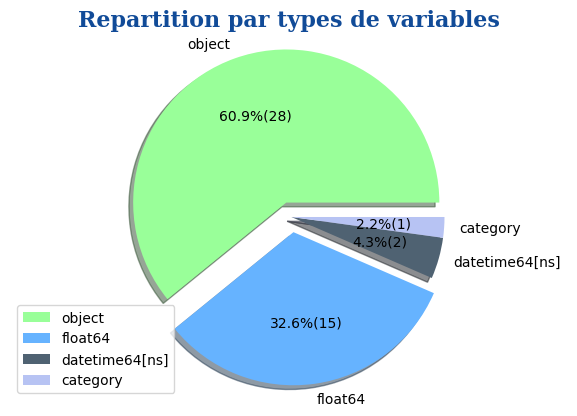

Types de variables  Nombre
0             object      28
1            float64      15
2     datetime64[ns]       2
3           category       1

In [8]:
dfood = typage(dfood)
dfood

# Affichage des types de variables dans la base.
repartitionTypeVar(dfood,figsize=(6, 4))

In [9]:
dfood.dtypes.value_counts()

object            28
float64           15
datetime64[ns]     2
category           1
dtype: int64

In [10]:
def infoDataFrame(data):
    display(Markdown('------------------------------------'))       
    display(Markdown('#### Info générales sur la base : {0}'.format(namestr(data, globals()))))
    display(Markdown('------------------------------------'))
    # print('--------------------------------------------------------------------------')
    # print('Info générales sur la base : {0}'.format(namestr(data, globals())))
    data.info()
    print(" ")
    print(" ")
    nbLigne = data.shape[0] 
    nbColonne = data.shape[1]
    print('Le jeu de données {} a {} lignes et {} colonnes.'.format(namestr(data, globals()),nbLigne,nbColonne))
    df=pd.DataFrame({'Variable':['lignes','colonnes'],'nombre':[nbLigne, nbColonne]})
    print(" ")
    display(df)

In [11]:
infoDataFrame(dfood)

------------------------------------

#### Info générales sur la base : ['dfood']

------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30359 entries, 0 to 30358
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   code                                     30359 non-null  object        
 1   creator                                  30359 non-null  object        
 2   created_datetime                         30359 non-null  datetime64[ns]
 3   last_modified_datetime                   30359 non-null  datetime64[ns]
 4   product_name                             30359 non-null  object        
 5   generic_name                             20608 non-null  object        
 6   quantity                                 29025 non-null  object        
 7   packaging                                28275 non-null  object        
 8   brands                                   30292 non-null  object        
 9   categories                             

Variable  nombre
0    lignes   30359
1  colonnes      46

<AxesSubplot: >

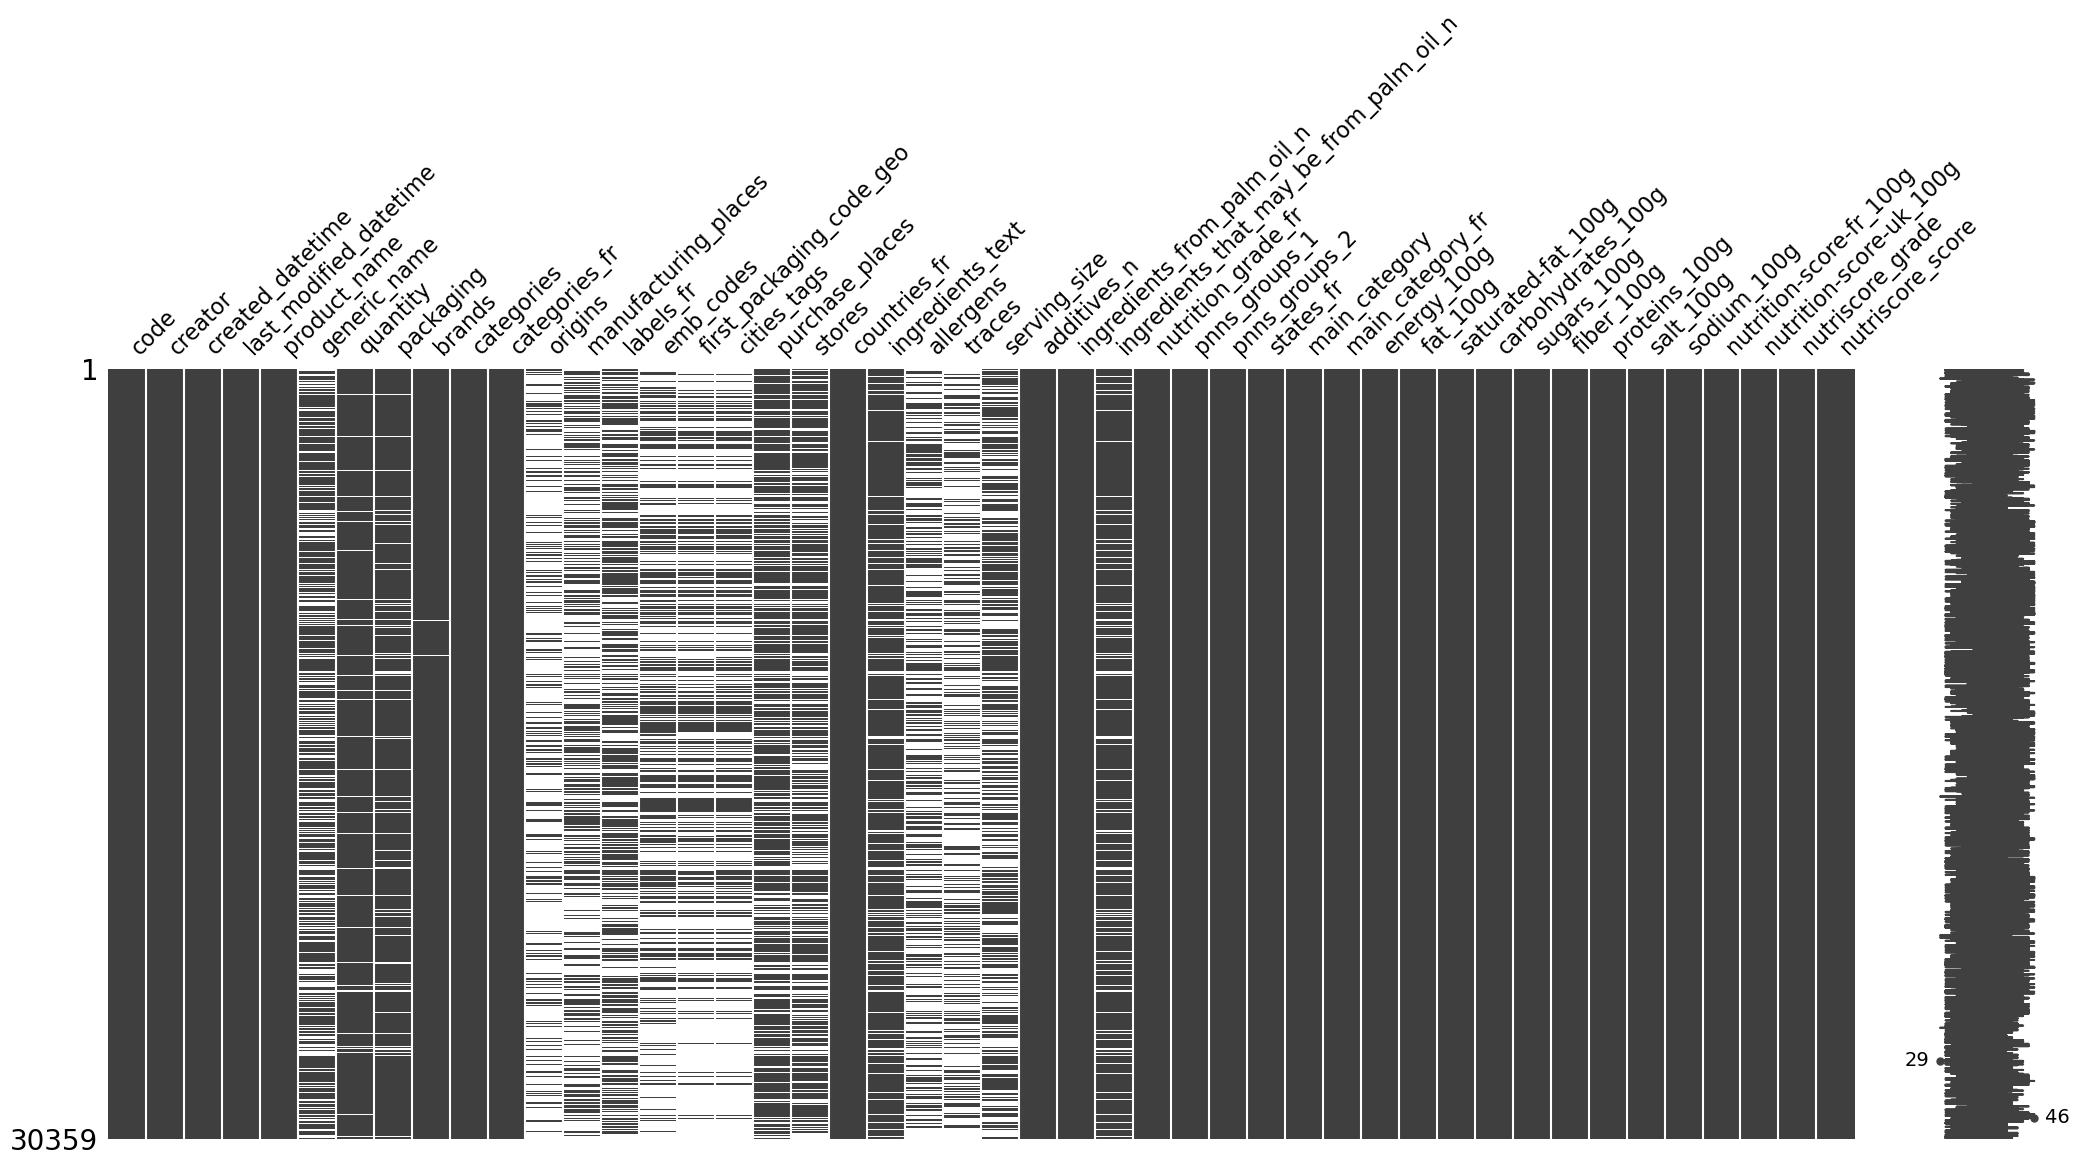

In [12]:
msno.matrix(dfood)

__Variables quantitatibes:__

<u>Variables quantitaves discrètes:</u>
- additives_n: Nombre d'additifs dans le produit


<u>Variables quantitavives continues:</u>
- nutrition-score-fr_100g: Nutrition score pour une portion de 100g de l'observation - nutrition-score-fr_100g: Nutrition score pour une portion de 100g de l'observation 
- energy_100g, proteins_100g, sugars_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sodium_100g: Valeurs nutritionelles pour une portion de 100g de l'observation

__Variables qualitatives:__

<u>Variables qualitatives nominales:</u>
- product_name: Nom du produit de l'observation
- brands: Marque du produit de l'observation
- pnns_groups_1 : groupe d'aliments auquel appartient l'observation
- pnns_groups_2 : sous-groupe d'aliments auquel appartient l'observation

<u>Variables qualitatives ordinales:</u>
- nutriscore_grade: groupe nutriscore auquel appartient l'observation

## <a id='3'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 3 - Analyse univariée </p> 
</a>

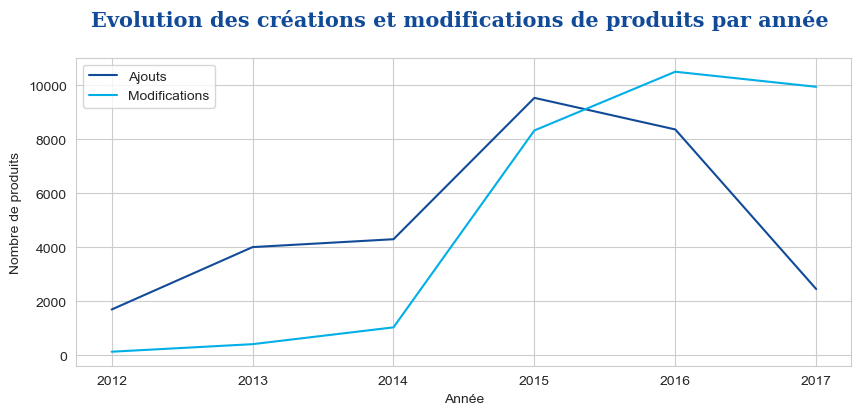

In [13]:
anneeAjout = dfood['code'].groupby(by=dfood['created_datetime'].dt.year).nunique()
anneeModif = dfood['code'].groupby(by=dfood['last_modified_datetime'].dt.year).nunique()

fig=plt.figure(figsize=(10,4))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 15,
             }

sns.set_style("whitegrid")
plt.plot(anneeAjout, 
         color="#114b98", 
         label="Ajouts")
plt.plot(anneeModif, 
         color="#00afe6", 
         label="Modifications")
plt.title("Evolution des créations et modifications de produits par année \n", 
          fontdict=font_title)
plt.xlabel("Année")
plt.ylabel("Nombre de produits")
plt.legend()
plt.savefig(imgPath+'AjoutModif.png', bbox_inches='tight')  
plt.show() 
plt.close()

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 5px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span>
        <p style='margin-left:0.9em;margin-right:0.9em;'>
            Nous constatons une <b><i> intensification </i></b> des modifications à a partir de 2015.<br> 
            Les créations connaissent une croissance sur la meme période. Cependant, elles <b><i> chutent </i></b> en 2017.
        </p>
    </span>
</div>

### Contributeurs Open Foods Facts

In [14]:
creators = dfood.groupby(by='creator')['code'].nunique().sort_values(ascending=False)

In [15]:
def plot_contributor(n=5):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    explodes = np.zeros(n)
    explodes[0] = .1

    def pct_tot(pct):
        tot = round(pct*creators[:n].sum(),0)
        tot_pct = tot/creators.sum()
        return "{:.1f}%\n({:.0f})".format(tot_pct,(tot/100))

    plt.pie(creators[:n], labels=creators[:n].index, 
            startangle=45, 
            shadow=True,
            explode=explodes,
            autopct=lambda pct: pct_tot(pct),
            textprops=dict(color="black",size=11)) # , weight="bold"
    plt.title("Qui sont les {:d} meilleurs contributeurs ?".format(n), 
              fontdict=font_title)
    plt.show()

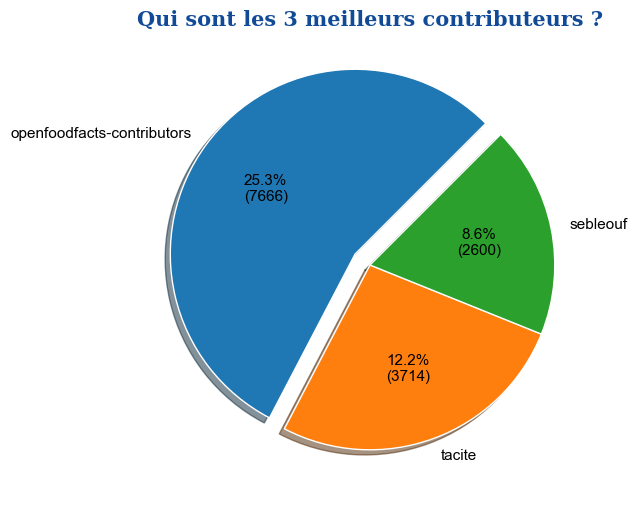

In [16]:
plot_contributor(n=3)

### Analyse du nutriscore

----------------------

La variable nutriscore est une variable importante dans notre analyse. elle sera considerée comme **target**.
Pour cela, dans cette section, nous allons faire un focus sur cette variable.

----------------------

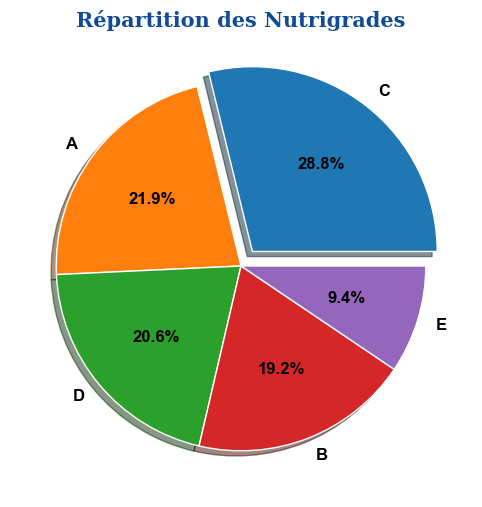

In [17]:
nutrigrades = dfood.groupby(by='nutriscore_grade')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(5)
explodes[0] = .1

plt.pie(nutrigrades, labels=nutrigrades.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition des Nutrigrades", fontdict=font_title)
plt.savefig(imgPath+'repartNutrigrade.png', bbox_inches='tight') 
plt.show()

# countplot ()

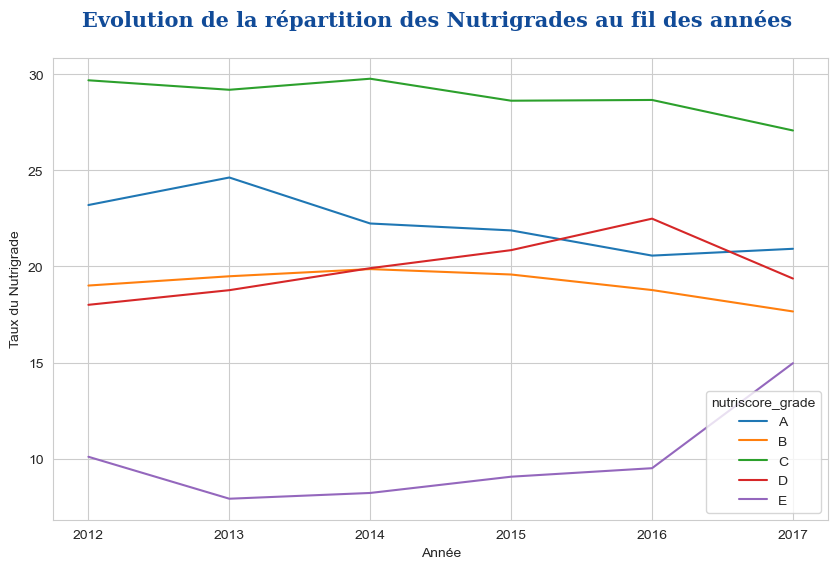

In [18]:
#On s'occupe ici uniquement des nutriscores et nutrigrades complétés
data_nutriscore = dfood[(dfood['nutriscore_grade'].isnull()==False) & 
                   (dfood['nutriscore_score'].isnull()==False)]

ng_per_year = data_nutriscore[['code','nutriscore_grade']].groupby(by=['nutriscore_grade',data_nutriscore['created_datetime'].dt.year]).nunique().reset_index()
cum_per_year = data_nutriscore[['code']].groupby(by=data_nutriscore['created_datetime'].dt.year).nunique().reset_index()
ng_per_year = pd.merge(ng_per_year, cum_per_year, how="left", left_on="created_datetime", right_on="created_datetime")
ng_per_year = ng_per_year.rename(columns={'created_datetime':'year', 'code_x':'nb_nutrigrade', 'code_y':'total_grade'})
ng_per_year['nutrigrade_rate'] = (ng_per_year['nb_nutrigrade'] / ng_per_year['total_grade'])*100

fig =plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='nutrigrade_rate', hue='nutriscore_grade', data=ng_per_year)
plt.xlabel("Année")
plt.ylabel("Taux du Nutrigrade")
plt.title("Evolution de la répartition des Nutrigrades au fil des années \n", fontdict=font_title)
plt.show()

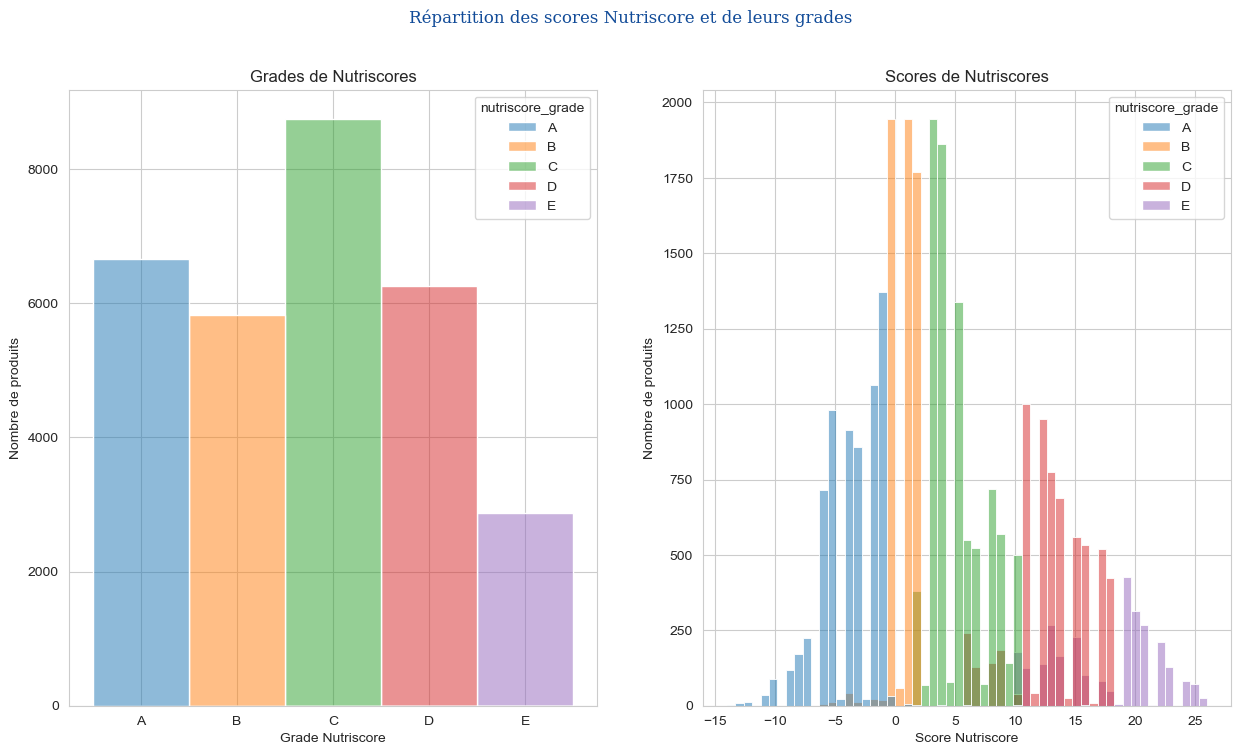

In [19]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15,8))
fig.suptitle(r"Répartition des scores Nutriscore et de leurs grades" "\n", fontdict=font_title)

sns.histplot(data=data_nutriscore.sort_values("nutriscore_grade"), x="nutriscore_grade", hue="nutriscore_grade", ax=axes[0])
axes[0].set_title('Grades de Nutriscores')
axes[0].set_xlabel("Grade Nutriscore")
axes[0].set_ylabel("Nombre de produits")

sns.histplot(data=data_nutriscore.sort_values("nutriscore_grade"), x="nutriscore_score", hue="nutriscore_grade", ax=axes[1])
axes[1].set_title('Scores de Nutriscores')
axes[1].set_xlabel("Score Nutriscore")
axes[1].set_ylabel("Nombre de produits")

plt.show()

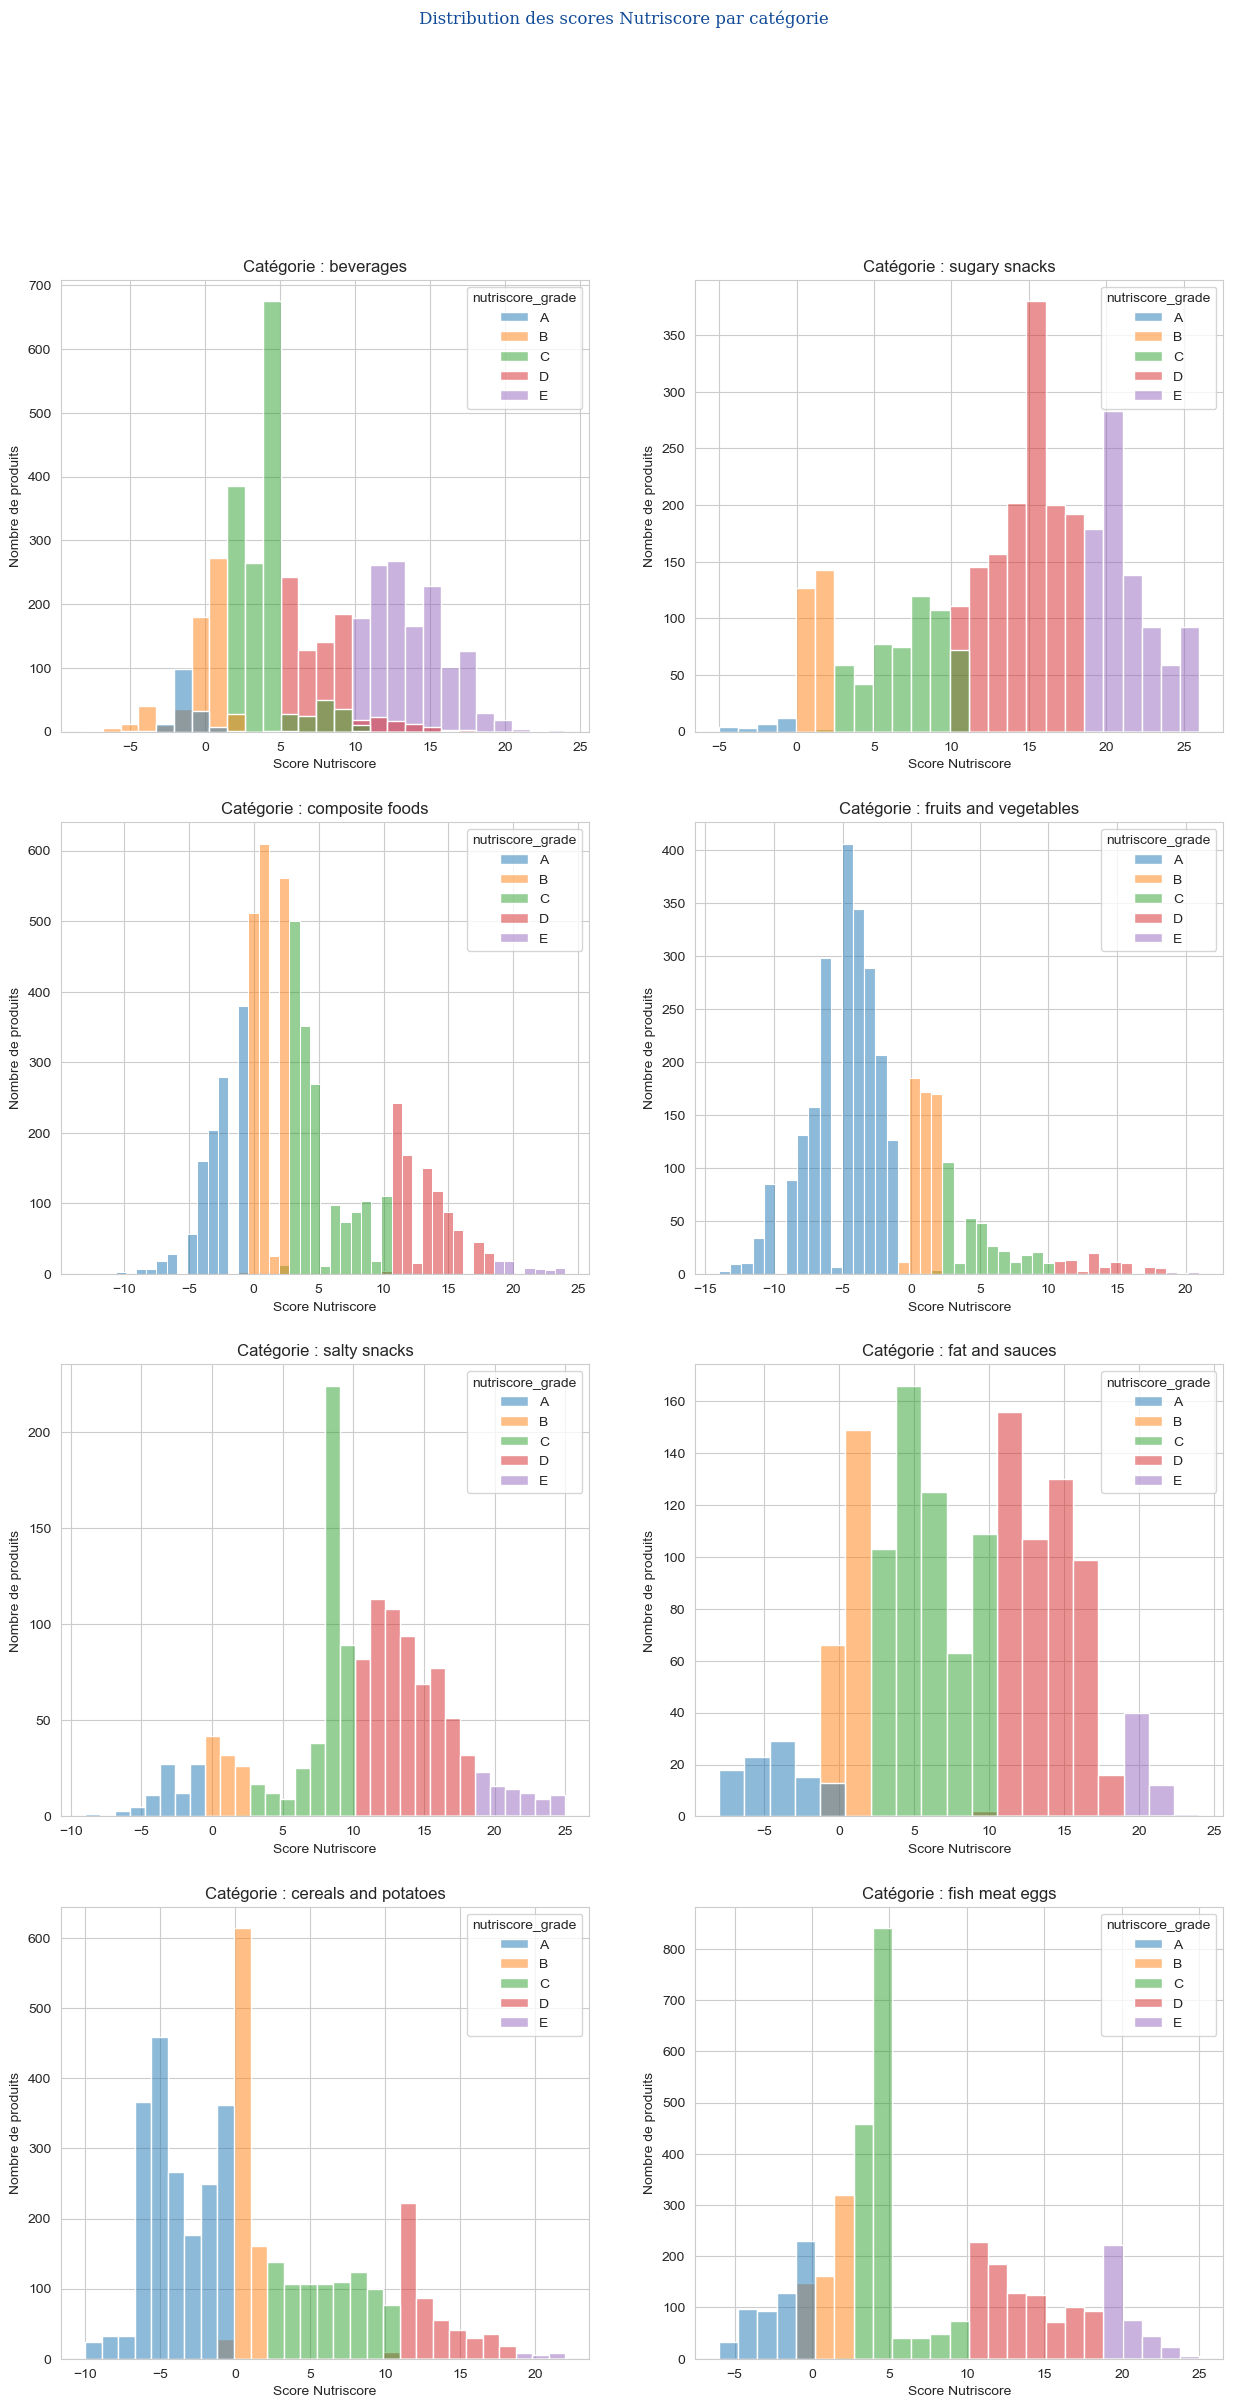

In [20]:
n_sub = len(data_nutriscore['pnns_groups_1'].unique())
n_col = 2
fig, axes = plt.subplots(int(n_sub/n_col), n_col, sharex=False, sharey=False, figsize=(15,int(3*n_sub)))
axes = np.array(axes)
fig.suptitle("Distribution des scores Nutriscore par catégorie", fontdict=font_title)
i=0
for ax in axes.reshape(-1):
    cat = data_nutriscore['pnns_groups_1'].unique()[i]
    subset = data_nutriscore[data_nutriscore['pnns_groups_1']==cat].sort_values("nutriscore_grade")
    sns.histplot(data=subset, x="nutriscore_score", hue="nutriscore_grade", ax=ax)
    ax.set_title('Catégorie : {}'.format(cat))
    ax.set_xlabel("Score Nutriscore")
    ax.set_ylabel("Nombre de produits")
    i+=1
plt.show()

### Distribution du nutriscore

In [21]:
def univariate_distribution(data,feature, graphName=''):
    """Histogramme et boxplot pour une variable numérique"""    
    mask = data[feature].notnull()
    datamask = data[mask]
    x=datamask[feature]
    fig = plt.figure(figsize=(12, 8))    
    plt.suptitle("Distribution empirique : " + feature, fontdict=font_title) # fontsize=25,     
    ax1 = plt.subplot(211)
    ax1.set_ylabel("Frequence", fontsize=10)
    ax2 = plt.subplot(212)
    ax2.set_xlabel("Valeur "+feature, fontsize=10)
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
    
    # graphique
    ax1.hist(x, bins=21)
    ax2.boxplot(datamask[feature], showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    if graphName!='':
        plt.savefig(imgPath+graphName, bbox_inches='tight')
    plt.show()
    plt.close()

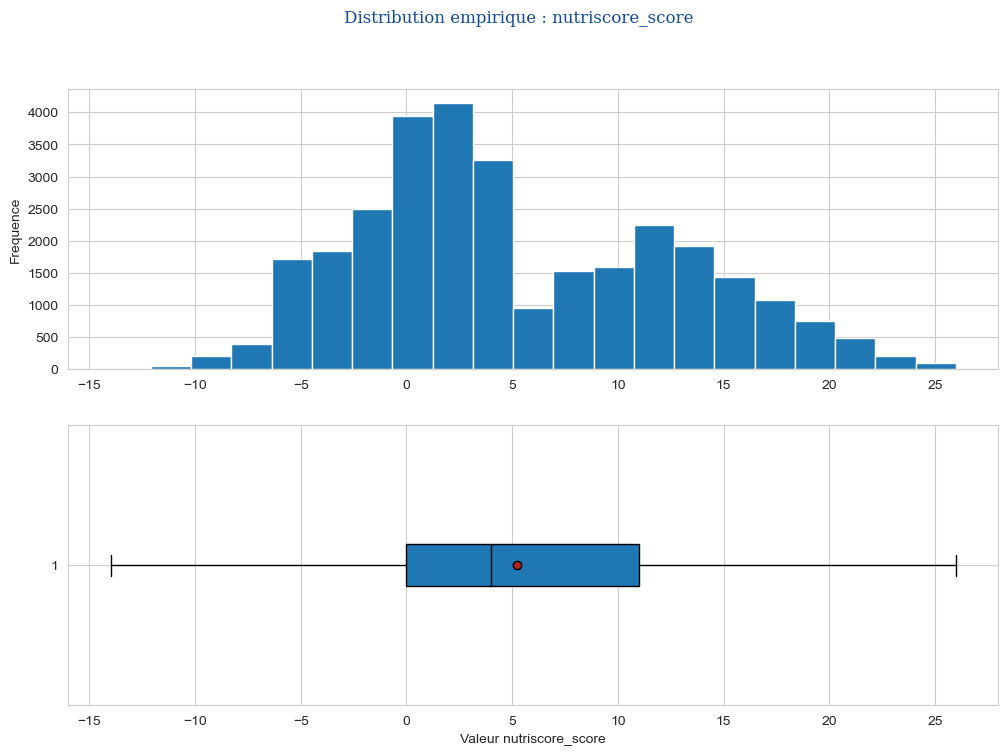

In [22]:
univariate_distribution(dfood,'nutriscore_score',graphName='distriNutriscore.png')

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> 
<p style='margin-left:0.9em;'>
    Nous observons une distribution bimodale (<b><i>deux modes</i></b>). En général, une distribution bimodale ne suit pas une loi normale.
    </p>
</span>
</div>

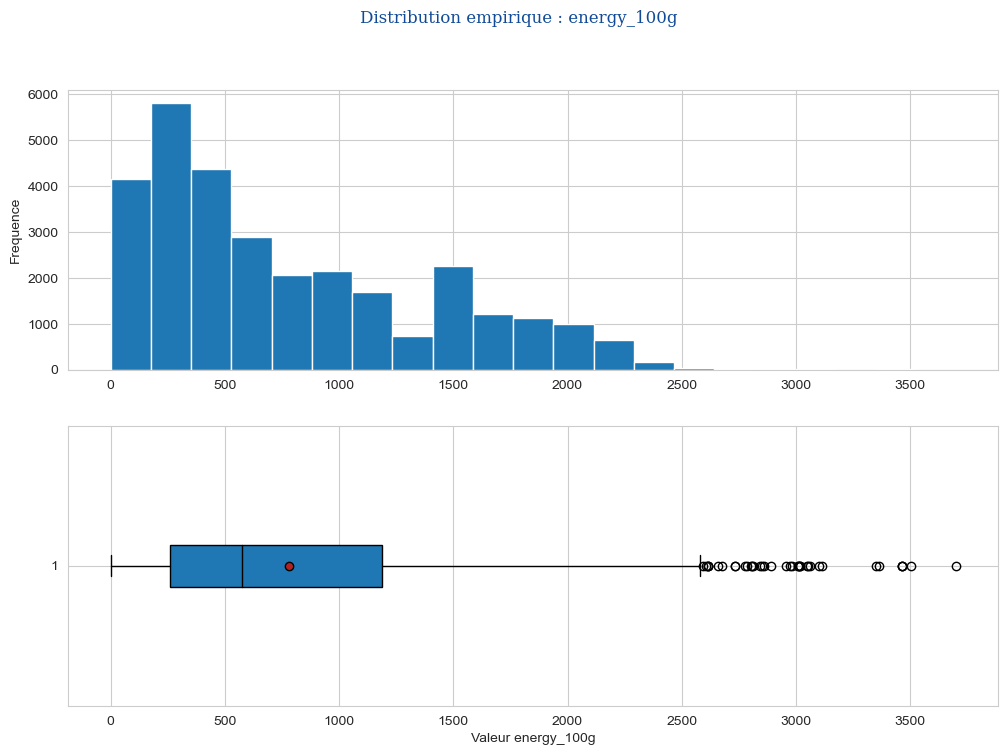

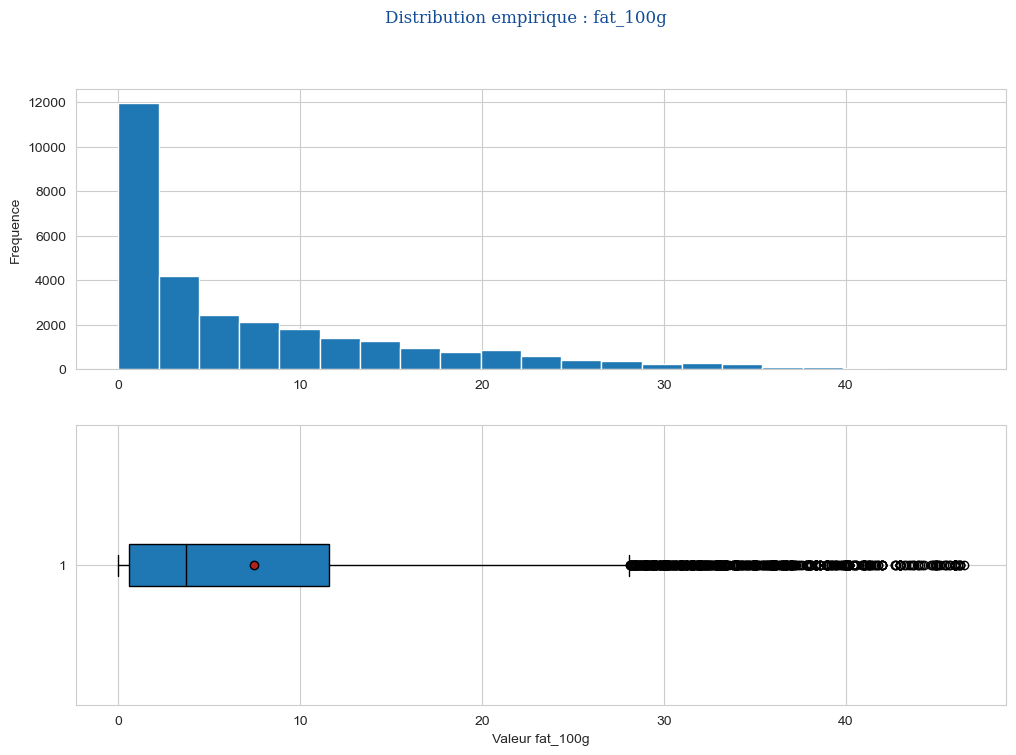

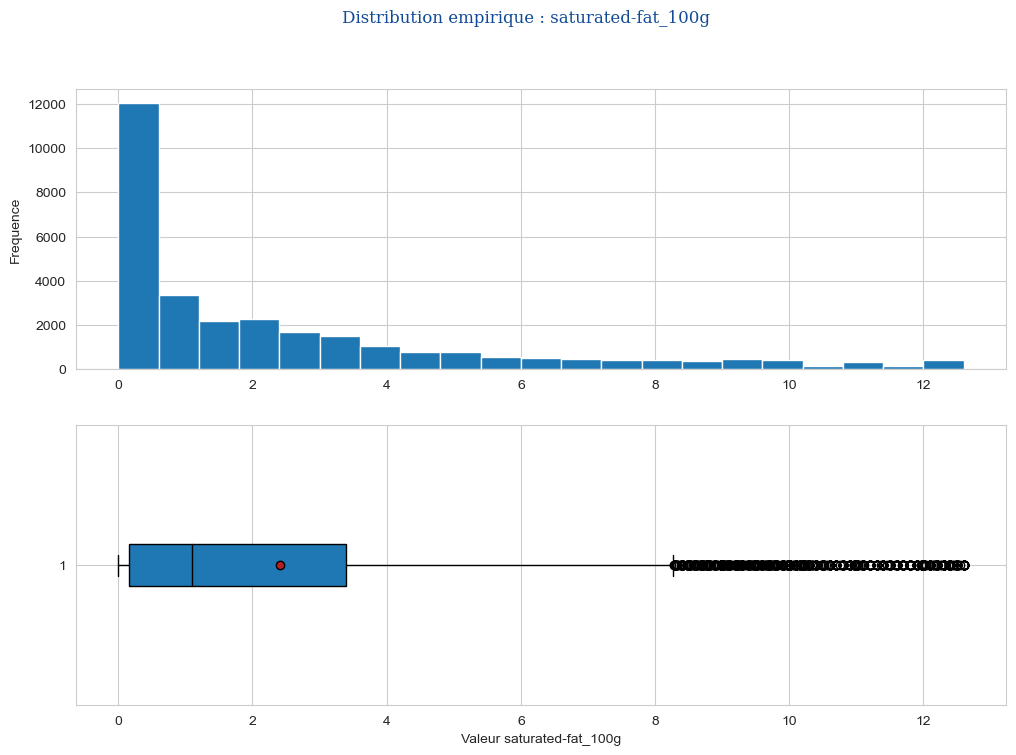

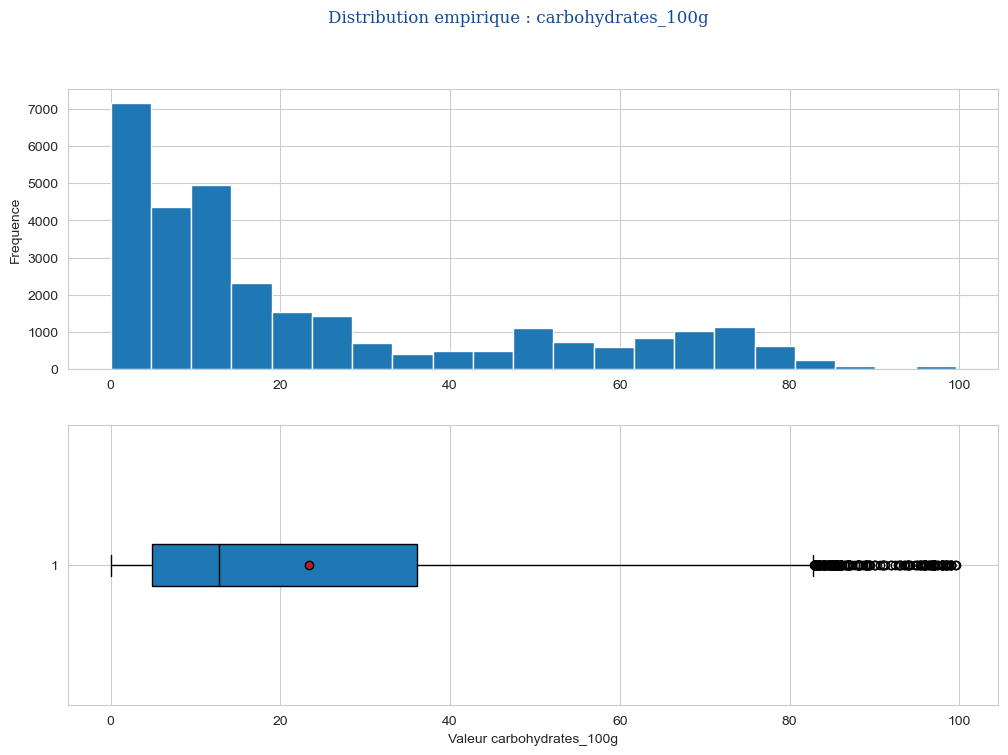

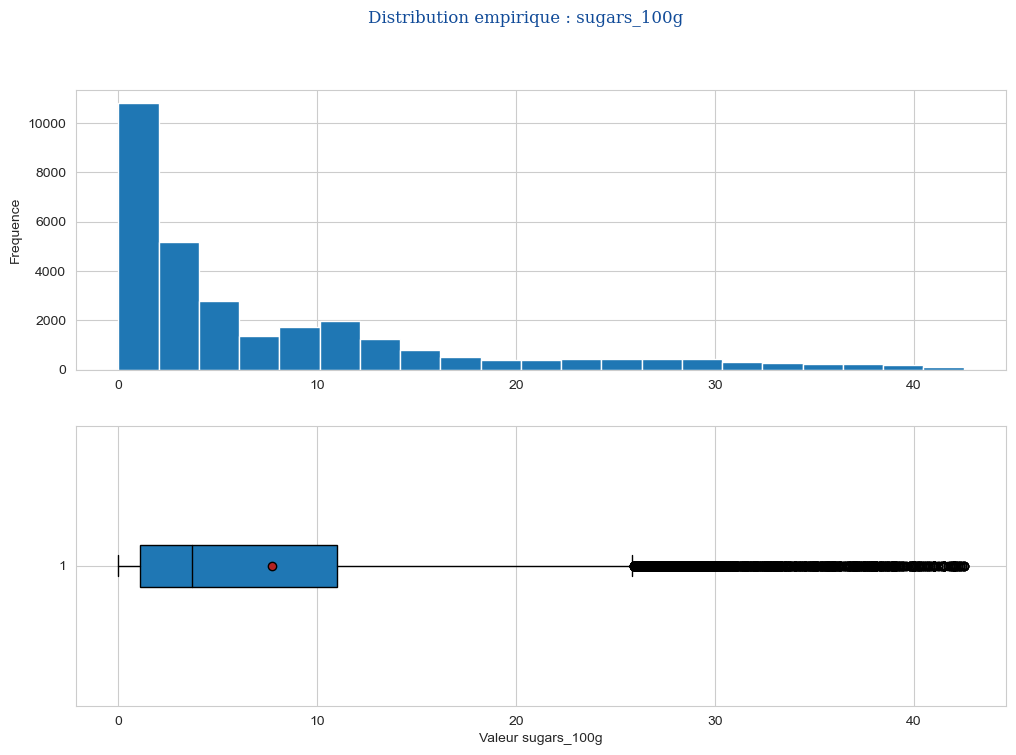

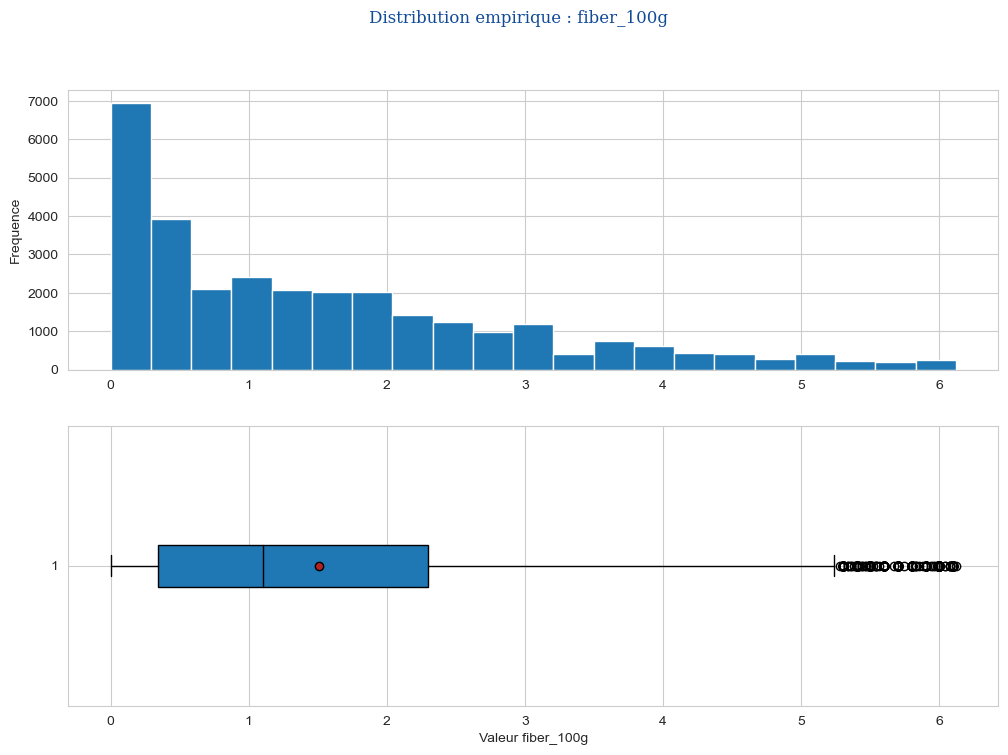

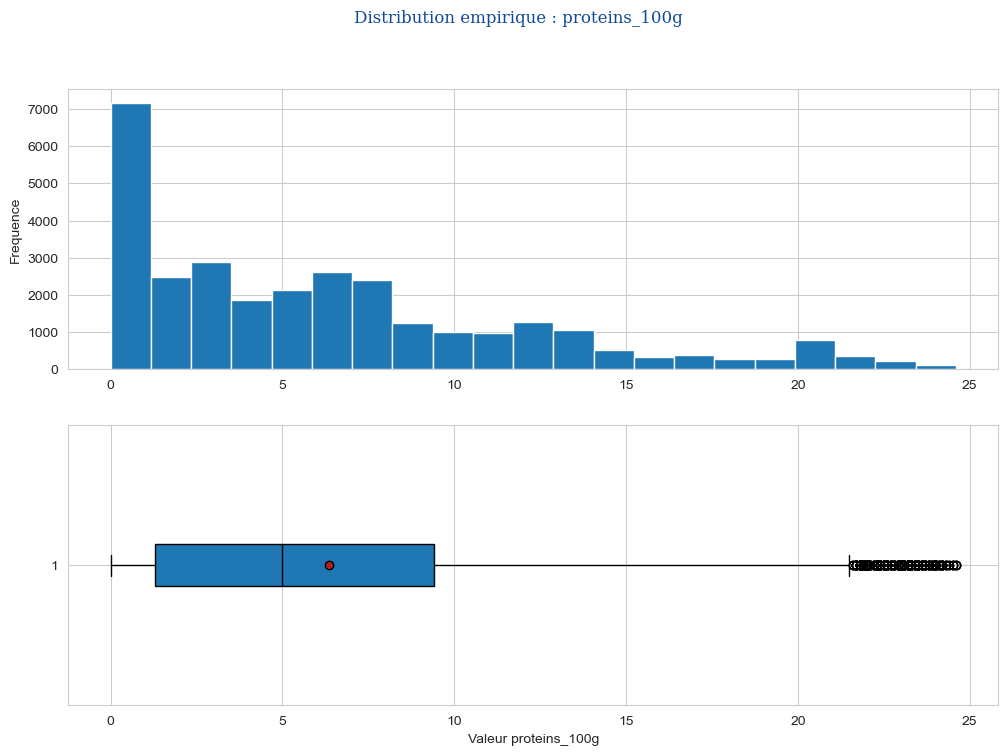

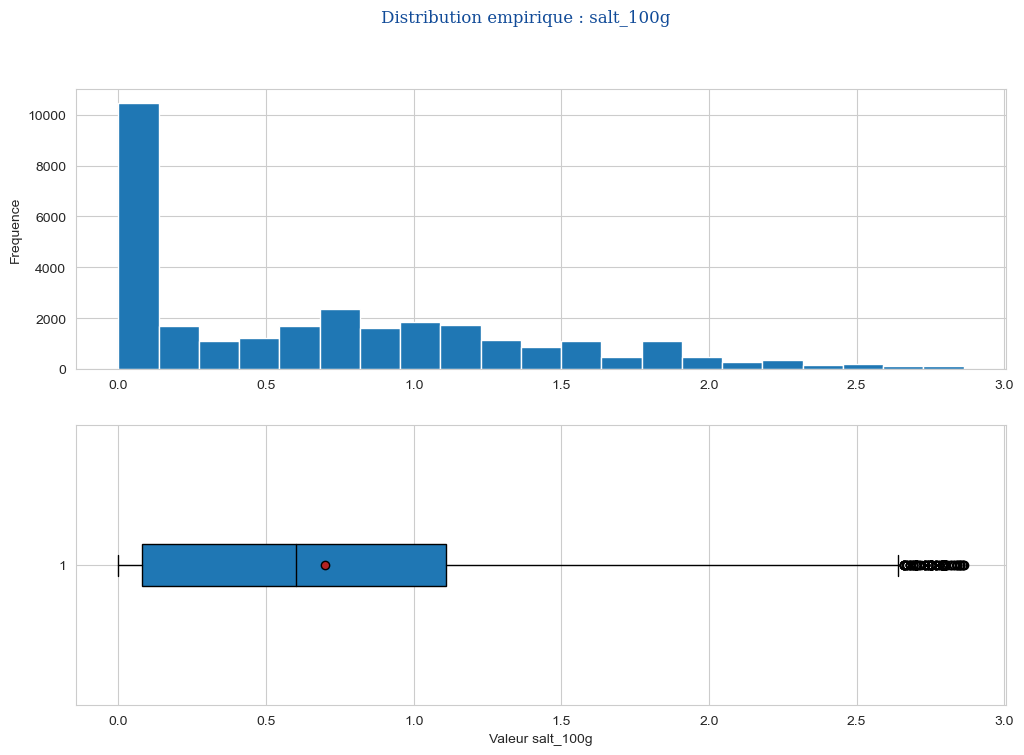

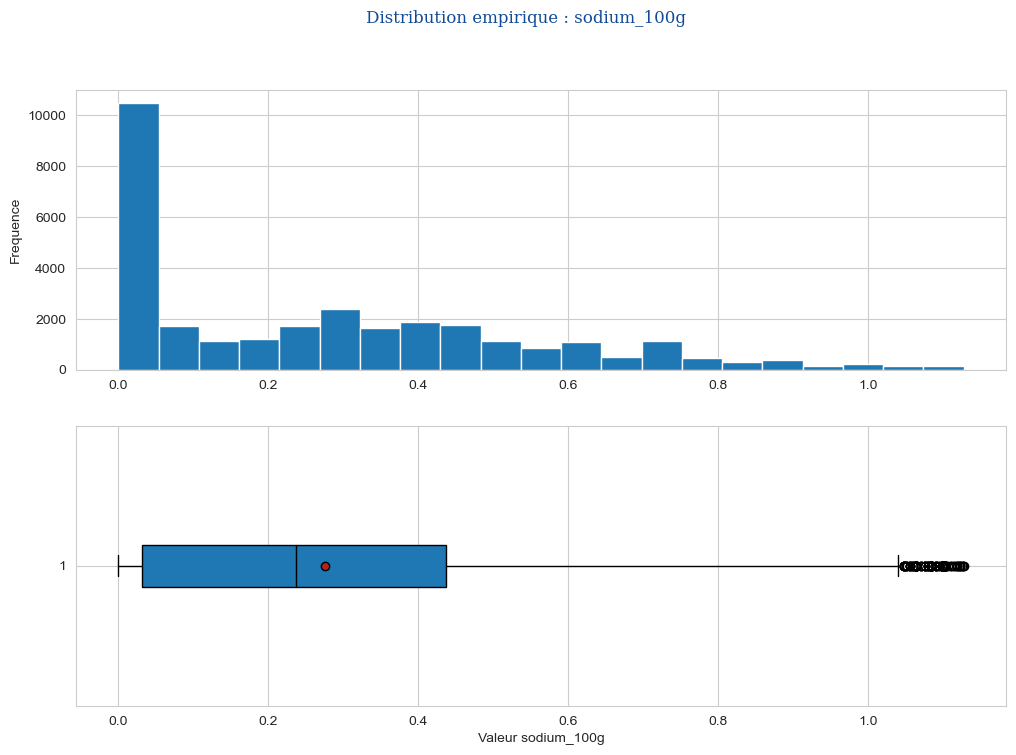

In [23]:
for feature in ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
    univariate_distribution(dfood,feature)

------------------------------------

#### Nuage de mots sur : product_name

------------------------------------

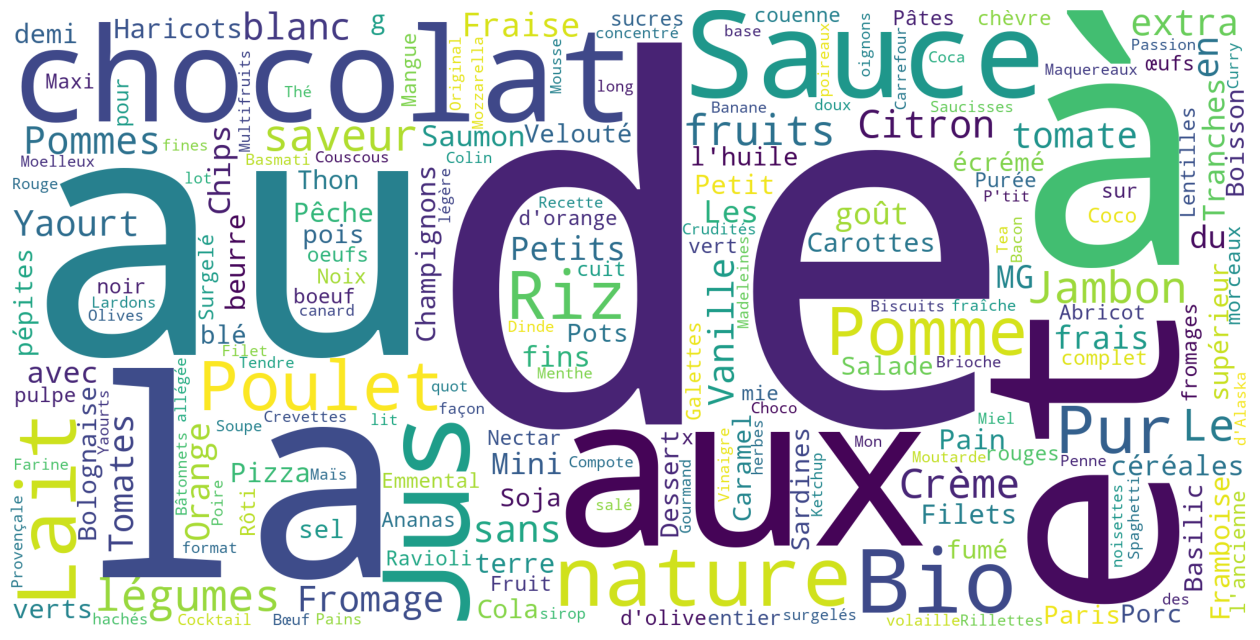

In [24]:
nuageMots(dfood, 'product_name',graphName='Nuage_product_name.png')

------------------------------------

#### Nuage de mots sur : categories_fr

------------------------------------

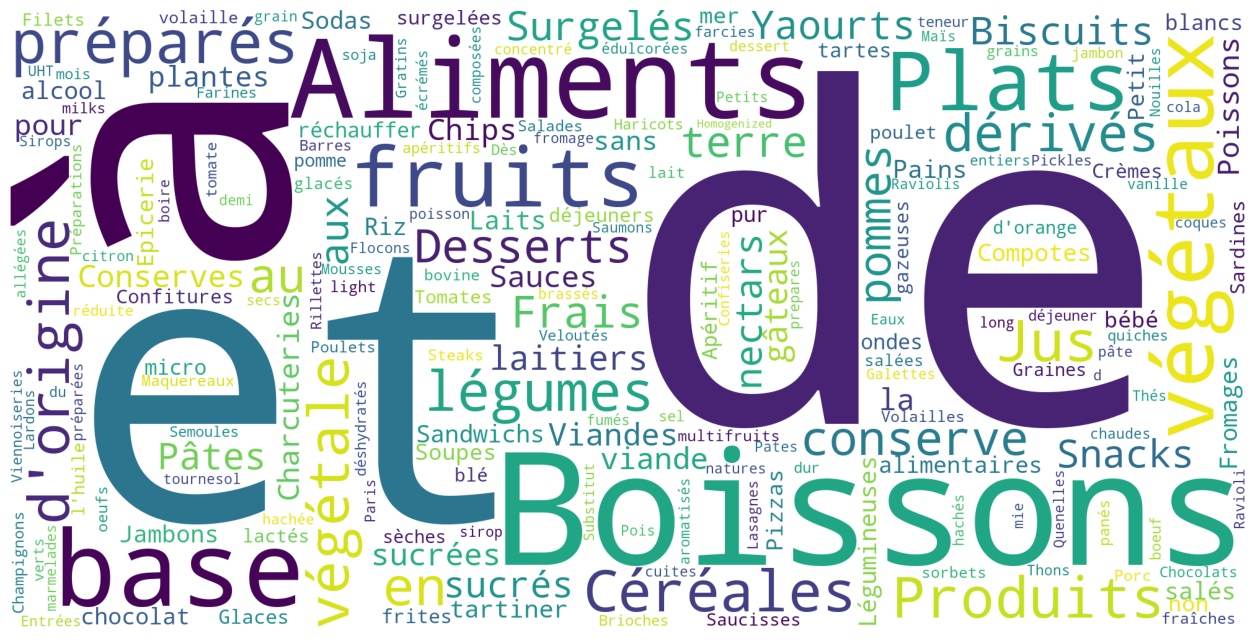

------------------------------------

#### Nuage de mots sur : labels_fr

------------------------------------

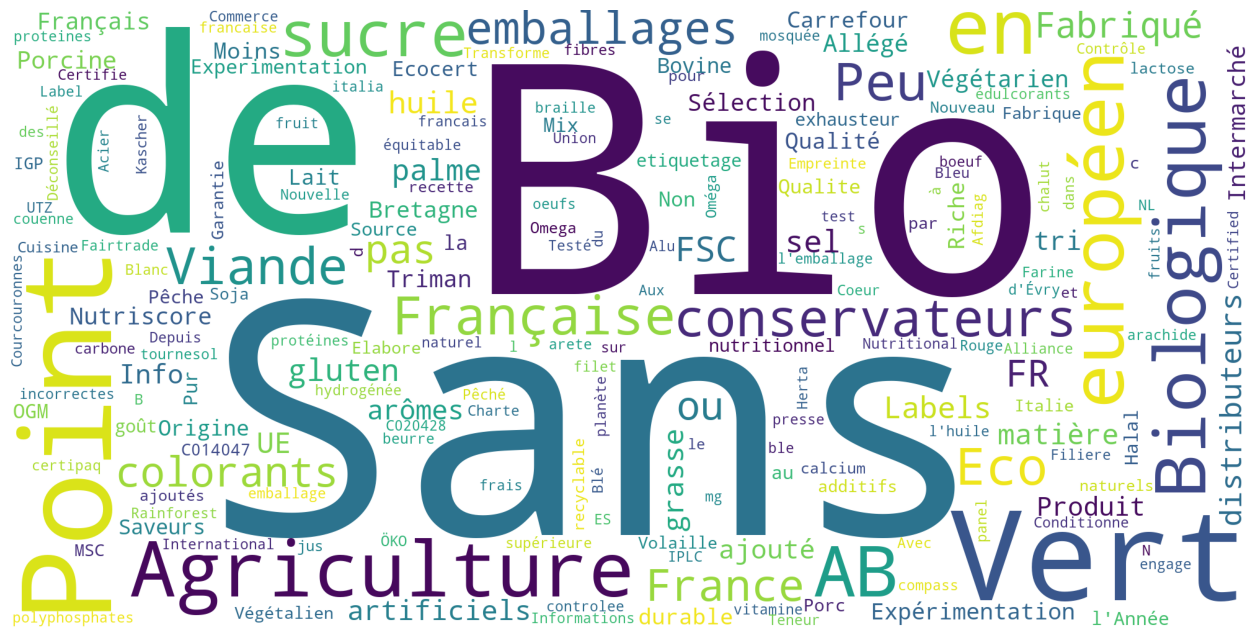

------------------------------------

#### Nuage de mots sur : brands

------------------------------------

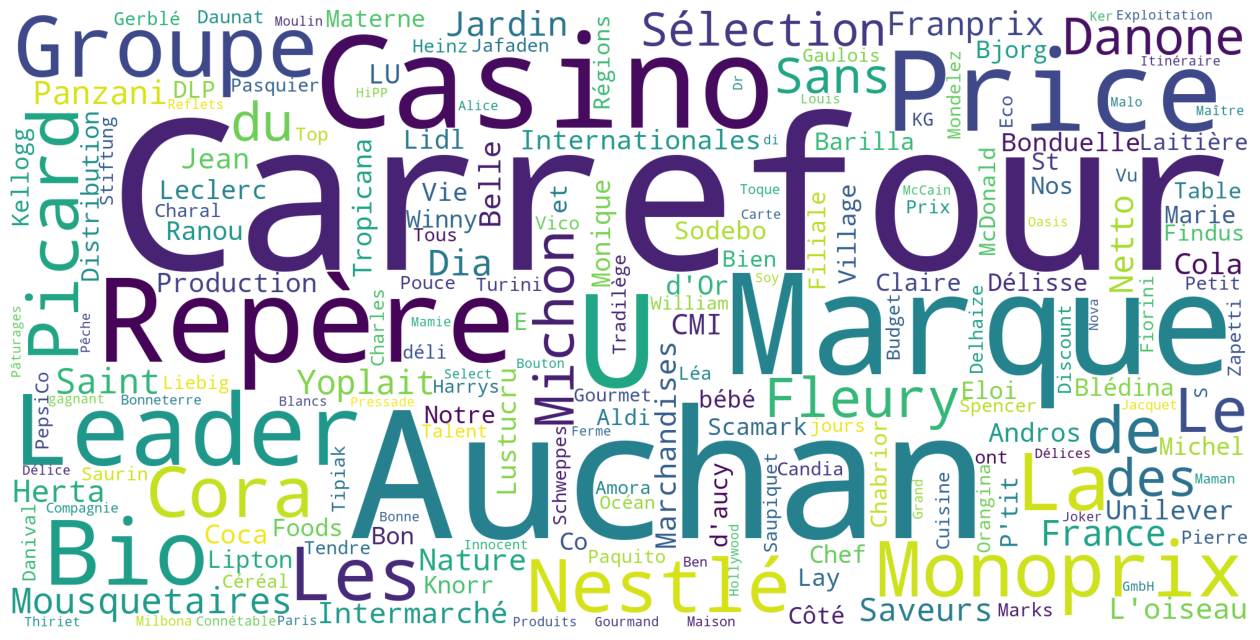

------------------------------------

#### Nuage de mots sur : countries_fr

------------------------------------

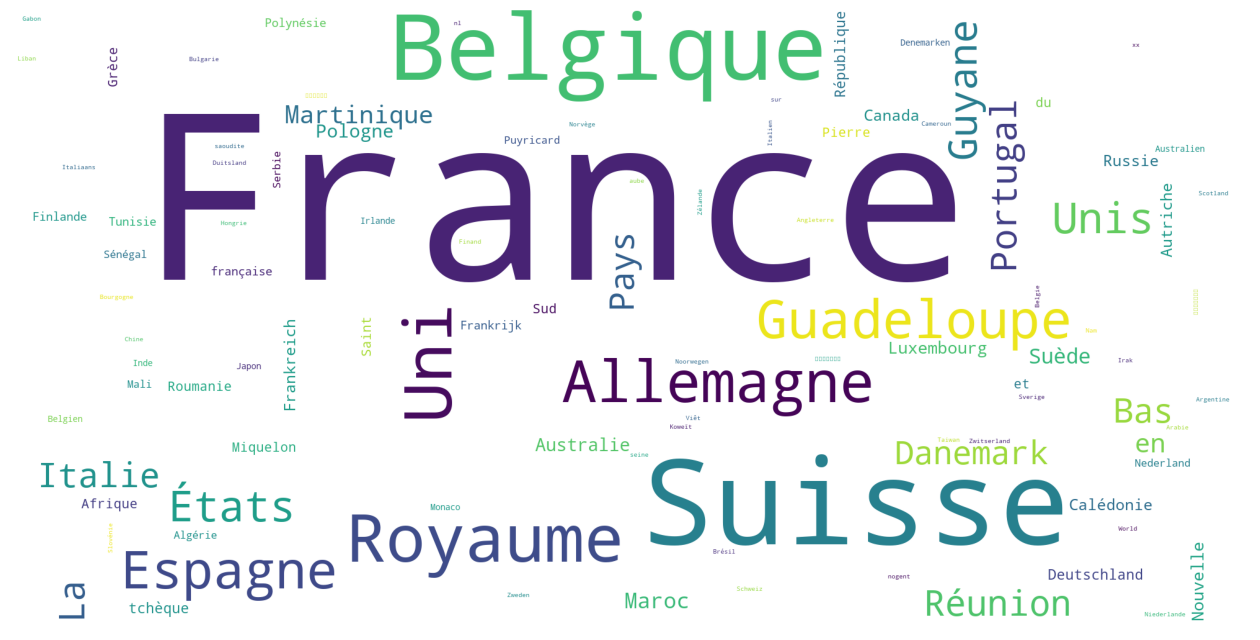

------------------------------------

#### Nuage de mots sur : pnns_groups_1

------------------------------------

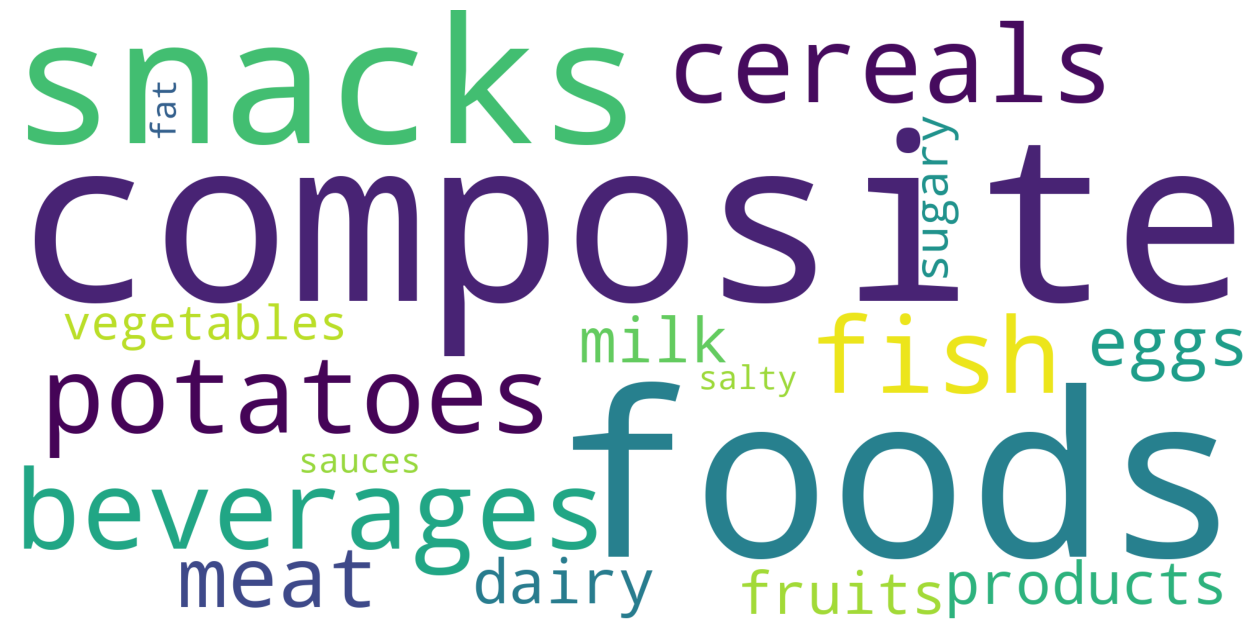

------------------------------------

#### Nuage de mots sur : pnns_groups_2

------------------------------------

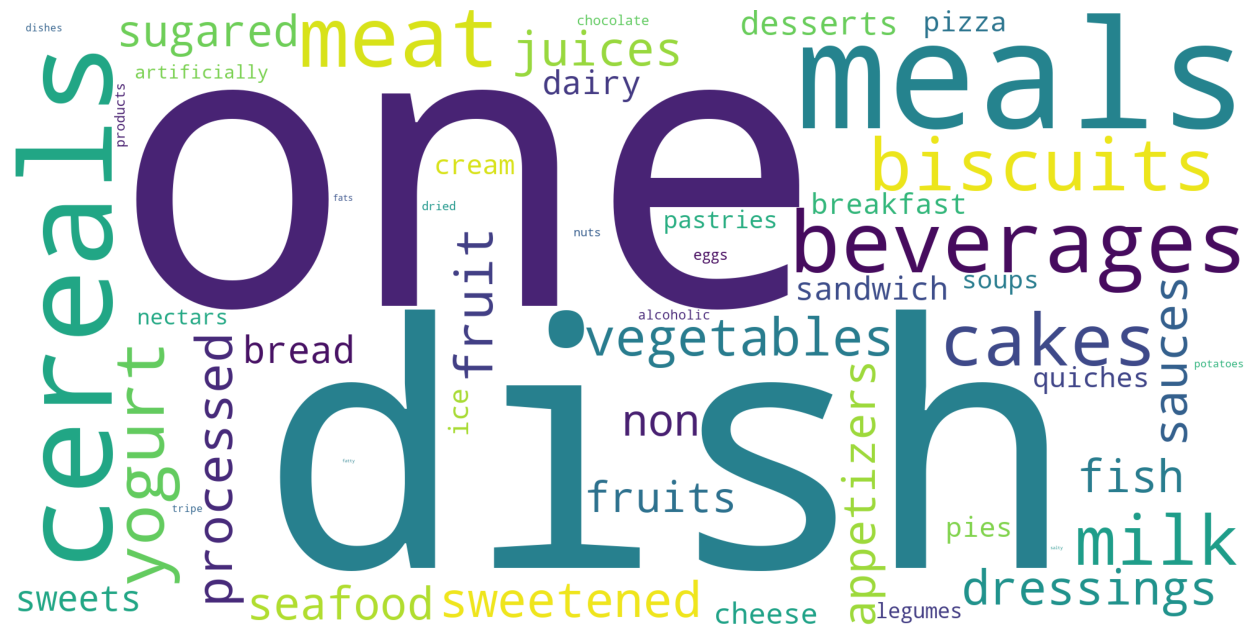

In [25]:
for feature in ['categories_fr', 'labels_fr','brands','countries_fr','pnns_groups_1','pnns_groups_2']:
    nuageMots(dfood, feature,graphName='Nuage_'+feature+'.png')

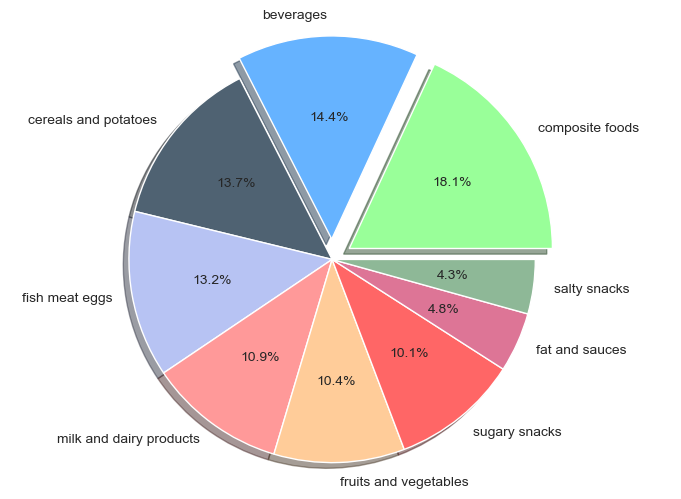

In [26]:
Camembert(dfood,'pnns_groups_1')

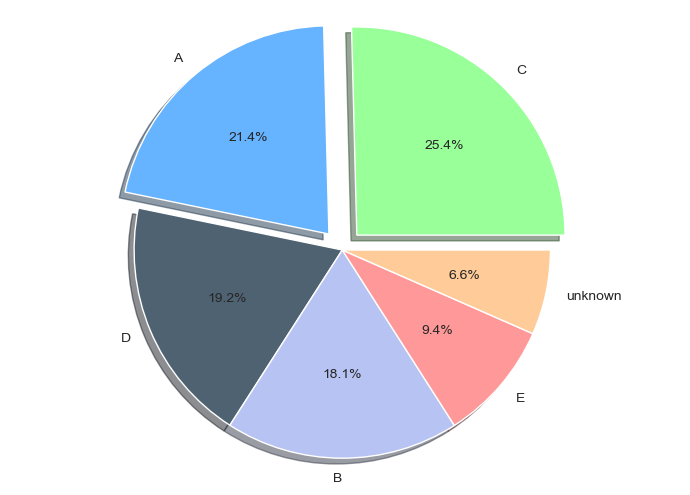

In [27]:
Camembert(dfood,'nutrition_grade_fr')

In [28]:
liste2=[col for col in dfood.columns.tolist() if '_100g' in col.lower()]
liste2

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

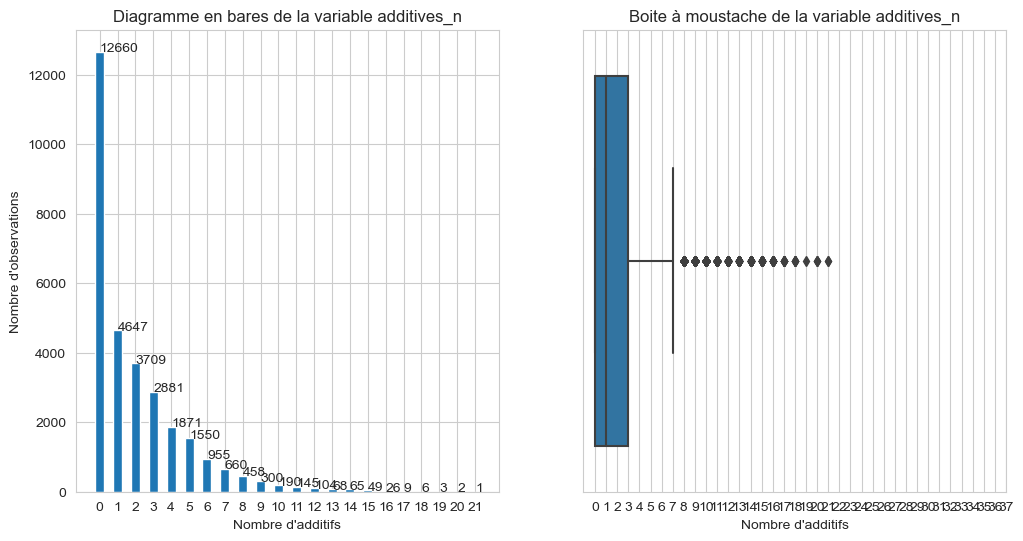

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Indicateurs de distribution


count    30359.000000
mean         2.000264
std          2.651211
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         21.000000
Name: additives_n, dtype: float64

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

#Barplot parametters
axes[0].bar(dfood["additives_n"].value_counts().index, dfood["additives_n"].value_counts().values, width=0.5)
axes[0].set_xticks(dfood["additives_n"].value_counts().index)
for idx, value in enumerate(dfood["additives_n"].value_counts()):
    axes[0].text(idx, value, str(value))
axes[0].set_xlabel("Nombre d'additifs")
axes[0].set_ylabel("Nombre d'observations")
axes[0].set_title("Diagramme en bares de la variable additives_n")

#Boxplot parametter
increments = 1
start, end = axes[1].get_xlim()
axes[1] = sns.boxplot(data=dfood, x='additives_n')
axes[1].xaxis.set_ticks(np.arange(0, 38, increments))
axes[1].set_title("Boite à moustache de la variable additives_n")
axes[1].set_xlabel("Nombre d'additifs")

plt.show()

print('-' * 223)
print("Indicateurs de distribution")
dfood["additives_n"].describe()

## <a id='4'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 4 - Analyse bivariée </p>  </a>
[Back to table of content](#s) <br>
[Go to Next section](#5)

---------
Afin de vérifier si la catégorie `pnns_groups_1` ou `pnns_groups_2` influence rééllement le Nutriscore, nous pouvons réaliser **une ANOVA (Analyse de la variance)**. Le choix de ce test est dû au fait que nous étudions 1 variable qualitative comparativement à une variable quantitative.

Les hypothèses posées seront donc les suivantes :
- ***H0*** : La distribution des échantillons est similaire *(et donc la catégorie n'a aucune influence sur le Nutriscore)*.
- ***H1*** : Une ou plusieurs distributions sont inégales.

Pour commencer, nous pouvons projeter les boxplots de la répartition des nutriscores par catégorie `pnns_groups_1` pour également vérifier les hypothèses de départ liées à l'ANOVA à savoir :
- Les observations dans chaque échantillon sont indépendantes et distribuées de manière identique (iid). 
- Les observations dans chaque échantillon ont la même variance.
- Les observations de chaque échantillon sont normalement distribuées. 


----------------------

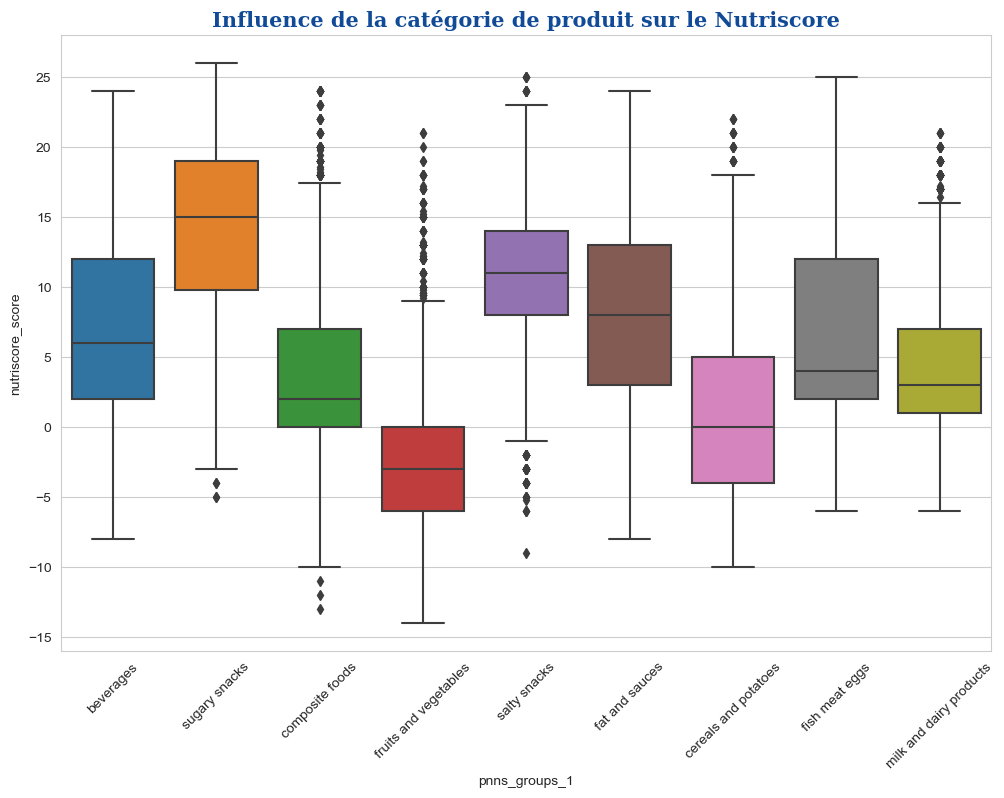

In [30]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data_nutriscore, x='pnns_groups_1', y='nutriscore_score')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit sur le Nutriscore", fontdict=font_title)
plt.show()

In [31]:
# ax = sns.boxplot(x='pnns_groups_1', y='nutriscore_score', data=dfood, color='#99c2a2')
# ax = sns.swarmplot(x='pnns_groups_1', y='nutriscore_score', data=dfood, color='#7d0013')
# plt.show()
# !pip install pingouin

## Analyse de la variance (ANOVA)

In [32]:
import pingouin as pg
from pingouin import anova

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> 
<p style='margin-left:0.9em;'>
    Avant de procéder à l'anova proprement dite, nous allons vérifier les hypothèses requises.  <br>
    - les populations étudiées suivent une <b><i>distribution normale</i></b> <br>
    - les variances des populations sont toutes égales (<b><i>HOMOSCEDASTICITE</i></b>)<br>
    - les échantillons  de tailles  sont prélevés <b><i>aléatoirement et indépendamment dans les populations</i></b>.
    </p>
</span>
</div>

### Test de normalité

In [33]:
from scipy.stats import anderson

def test_AndersonDarling(data, var,seuil=1):    
    mask = data[var].notnull()
    datamask = data[mask]
    dataTest = datamask[var]
    # Application du Test d'Anderson-Darling 
    liste=list(anderson(dataTest, dist='norm')[2])
    statistic=anderson(dataTest, dist='norm')[0]
    critical_value=anderson(dataTest, dist='norm')[1][liste.index(seuil)]
    return print('Distribution normale '+var+' :',statistic<=critical_value)
    

In [34]:
test_AndersonDarling(dfood, 'nutriscore_score')

Distribution normale nutriscore_score : False


In [35]:
varList=['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 
         'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

for var in varList:
    test_AndersonDarling(dfood, var)

Distribution normale energy_100g : False
Distribution normale fat_100g : False
Distribution normale saturated-fat_100g : False
Distribution normale carbohydrates_100g : False
Distribution normale sugars_100g : False
Distribution normale fiber_100g : False
Distribution normale proteins_100g : False
Distribution normale salt_100g : False
Distribution normale sodium_100g : False


### Autres tests de normalité

In [36]:
pg.normality(dfood, group='pnns_groups_1', dv='nutriscore_score')

W          pval  normal
pnns_groups_1                                          
beverages                0.967557  2.464999e-30   False
sugary snacks            0.962332  1.307292e-27   False
composite foods          0.931153  9.809089e-45   False
fruits and vegetables    0.926569  8.458894e-37   False
salty snacks             0.966106  5.861802e-17   False
fat and sauces           0.982487  3.091096e-12   False
cereals and potatoes     0.922711  7.056939e-42   False
fish meat eggs           0.923251  3.062258e-41   False
milk and dairy products  0.930308  8.078962e-37   False

In [37]:
from scipy.stats import shapiro
mask = dfood['nutrition-score-fr_100g'].notnull()
datamask = dfood[mask]
data_nutrition_score = datamask['nutrition-score-fr_100g']
# test de Shapiro
shapiro(data_nutrition_score)

ShapiroResult(statistic=0.9710896611213684, pvalue=0.0)

### Test d'Anderson-Darling

In [38]:
mask = dfood['nutrition-score-fr_100g'].notnull()
datamask = dfood[mask]
data_nutrition_score = datamask['nutrition-score-fr_100g']

# Test d'Anderson-Darling
anderson(data_nutrition_score, dist='norm')

AndersonResult(statistic=336.64165011022124, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.224891234817355, scale=7.38419891153853)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')



<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> 
<p style='margin-left:0.9em;'>
    La statistique de test <b><i>A2 du test d'Anderson-Darling</i></b> est plus grande que la valeur critique au seuil de 1%.<br>
    L'<b><i>hypothèse est donc rejettée</i></b> (distribution non normale) au risque de 1%.    
    </p>
</span>
</div>

### Homoscedasticité

In [39]:
pg.homoscedasticity(dfood, group='pnns_groups_1', dv='nutriscore_score')

W           pval  equal_var
levene  78.797796  1.627466e-129      False

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 2px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> 
<p style='margin-left:0.9em;'>
    Le test rejette l'hypothèse d'<b><i> homoscedasticité </i></b>. Compte tenu de ces résultats, nous allons procéder à un test de Kruskall Wallis. </p>
</span>
</div>

In [40]:
# aov=pg.welch_anova(data=dfood, dv='nutriscore_score', between='pnns_groups_1')
# aov = pg.anova(data=dfood, dv='nutriscore_score', between='pnns_groups_1', detailed=True)
# df.anova(dv='nutriscore_score', between='pnns_groups_1', detailed=True)
from pingouin import kruskal
aov=kruskal(data=dfood, dv='nutriscore_score', between='pnns_groups_1')
aov

Source  ddof1             H  p-unc
Kruskal  pnns_groups_1      8  10148.090847    0.0

In [41]:
# aovPost=pg.pairwise_gameshowell(data=dfood, dv='nutriscore_score', between='pnns_groups_1')
# aovPost[aovPost.pval>0.05]
# !pip install scikit_posthocs
import scikit_posthocs as sp
aovPost=sp.posthoc_dunn(dfood, 'nutriscore_score', 'pnns_groups_1', 'bonferroni')
aovPost.round(3).reset_index()
aovPost=aovPost.style.applymap(lambda x: 'background-color : green' if x<0.05 else '')
aovPost

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 2px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> 
<p style='margin-left:0.9em;'>
    Le test <b><i>Post Hoc (bonferroni) </i></b> permet de dire que les groupes <b><i>fat and sauces</i></b> et <b><i>beverages</i></b> sont presques identiques et diffèrent, cependant, des autres groupes. </p>
</span>
</div>

### Matrice de corrélation linéaire

--------------

Les distributions n'étant pas normales, nous allons utiliser un test de correlation de Spearman.

-------------------

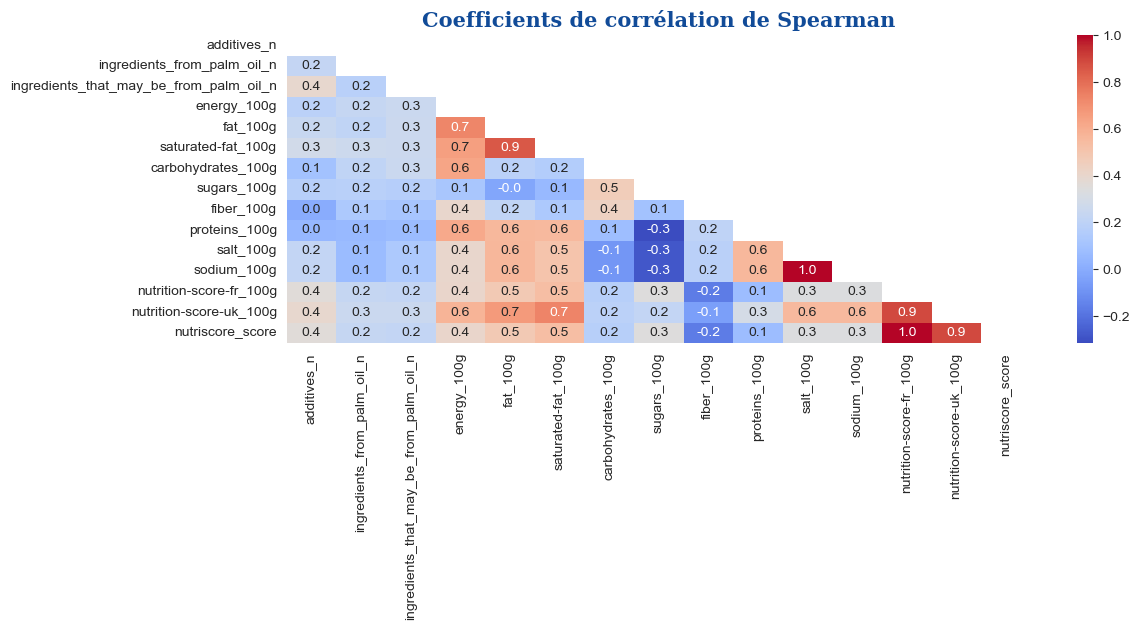

In [42]:
# Matrice des corrélations
upp_mat = np.triu(data_nutriscore.corr(method='spearman',numeric_only=True))
plt.figure(figsize=(12,4)) 
ax = sns.heatmap(data_nutriscore.corr(method='spearman',numeric_only=True), annot=True, fmt=".1f",cmap='coolwarm', mask = upp_mat) # cmap = 'coolwarm'
plt.title("Coefficients de corrélation de Spearman", fontdict=font_title)
plt.savefig(imgPath+'correlation.png', bbox_inches='tight')
plt.show()

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 2px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> 
<p style='margin-left:0.9em;'>
    L'analyse de la matrice de corrélation montre que les variables <b><i> `fat_100g`, `saturated-fat_100g`  </i></b> sont correlées avec la variable d'interêt <b><i> le nutriscore </i></b>. 
    Elles pourront être utilisées dans une analyse multi variée pour predire le <b><i> le nutriscore </i></b> </p>
</span>
</div>

In [43]:
from scipy.stats import spearmanr
def significance_corr(data,dv, varList):
    dataframe=[]
    for var in varList:
        coef, p = spearmanr(data[dv], data[var])
        datas=pd.DataFrame({'coef':[coef.round(2)], 'P-value':[p.round(4)]})
        datas.insert(0, 'var2', var)
        datas.insert(0, 'var1', dv)
        dataframe.append(datas)
   
    dfCorr=pd.concat(dataframe)
    conditions = [dfCorr['P-value']<0.01,(dfCorr['P-value']>=0.01)&(dfCorr['P-value']<0.05),
                  (dfCorr['P-value']>=0.05)&(dfCorr['P-value']<0.10)]
    choices = ["***","**","*"]
    dfCorr['Sig.'] = np.select(conditions, choices, default="--")
    
    return dfCorr

dfCorr=significance_corr(data=dfood,dv='nutriscore_score', 
                         varList=['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
                                  'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'])
dfCorr

var1                var2  coef  P-value Sig.
0  nutriscore_score         energy_100g  0.41      0.0  ***
0  nutriscore_score            fat_100g  0.48      0.0  ***
0  nutriscore_score  saturated-fat_100g  0.54      0.0  ***
0  nutriscore_score  carbohydrates_100g  0.17      0.0  ***
0  nutriscore_score         sugars_100g  0.34      0.0  ***
0  nutriscore_score          fiber_100g -0.17      0.0  ***
0  nutriscore_score       proteins_100g  0.07      0.0  ***
0  nutriscore_score           salt_100g  0.33      0.0  ***
0  nutriscore_score         sodium_100g  0.33      0.0  ***


## <a id='3'> <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 5 - Analyse en composantes principales </p> 
</a>

---------------
L'analyse en composantes principales **(ACP ou PCA en anglais)** permet de réduire le nombre de dimensions d'un jeu de données décrit par un grand nombre de variables. Cela permet une visualisation simplifiée et une accélération des calculs. 

Pour ce faire, nous allons nous inspirer du cours sur le site ***OpenClassrooms***.

***Nous allons d'abord normaliser les données.*** [lien](https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/analyses-en-composantes-principales)

-----------------------------

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [46]:
varList=['additives_n','ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g','saturated-fat_100g', 
         'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
# X = data_nutriscore.select_dtypes(include=['float64','int64'])  

<AxesSubplot: >

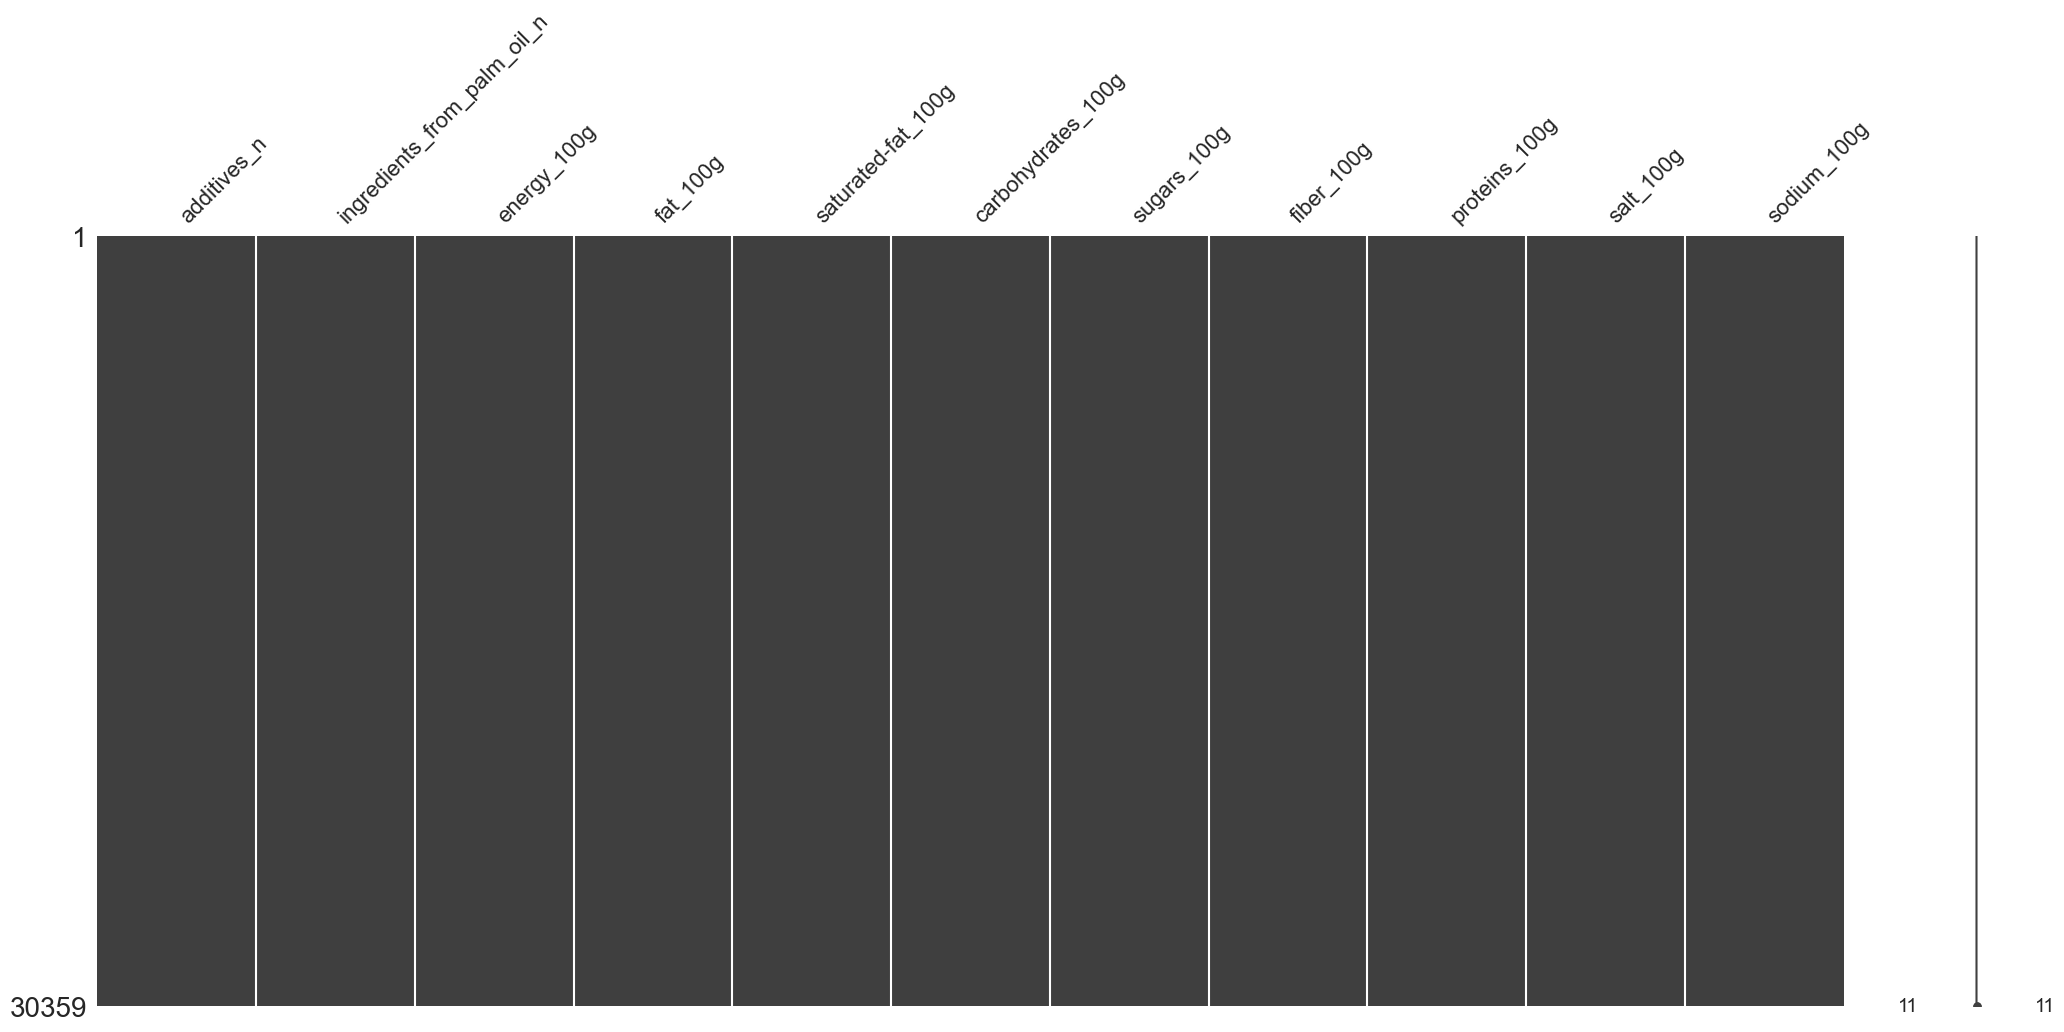

In [47]:
msno.matrix(data_nutriscore[varList])

In [48]:

X = data_nutriscore[['product_name']+varList]
X=X.set_index('product_name')
# X.fillna({'additives_n':X.loc[:,'additives_n'].median(),
#           'ingredients_from_palm_oil_n' : X.loc[:,'ingredients_from_palm_oil_n'].median()},inplace=True)
# X.fillna(X.median())
# X=X.dropna()
X_scaled = scale(X)

In [49]:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10
mean  0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

Après normalisation, nous notons que la moyenne est nulle et que la variance vaut 1.

In [50]:
len(X_scaled)

30359

In [51]:
pca = PCA()
pca.fit(pd.DataFrame(X_scaled))

PCA()

In [52]:
pca = PCA(n_components=pd.DataFrame(X_scaled).shape[1])
pca.fit(X_scaled)

PCA(n_components=11)

#### Variance expliquée

In [53]:
display(Markdown('------------------------------------')) 
display(Markdown('#### Variance expliquée par axe')) 
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)

display(Markdown('------------------------------------')) 
display(Markdown('#### Variance expliquée cumulée'))
scree_cum = scree.cumsum().round(2)
print(scree_cum)

------------------------------------

#### Variance expliquée par axe

[32.88 21.4  12.13  8.45  6.77  6.09  5.11  4.22  2.47  0.49  0.  ]


------------------------------------

#### Variance expliquée cumulée

[ 32.88  54.28  66.41  74.86  81.63  87.72  92.83  97.05  99.52 100.01
 100.01]


<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; padding-bottom: 2px;padding-top: 10px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span> 
        <p style='margin-left:0.5em;margin-right:0.5em;'>
Avec les proportions de variance expliquée, nous notons que les <b><i> huits(8) premiers facteurs restituent 97% de la variabilité</i></b>.
        </p>
    </span>
</div>

### Graphique barplot des varainces expliquées

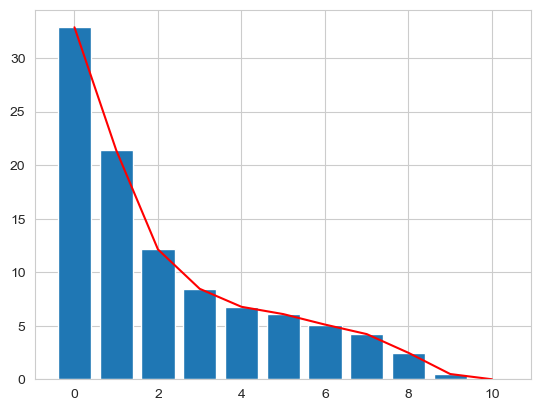

In [54]:
plt.bar(range(len(scree)),scree)
plt.plot(range(len(scree)),scree, color='red')
plt.show()

In [55]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(X_scaled.shape[1])], 
        "Variance expliquée" : (pca.explained_variance_).round(2),
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    })
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1                3.62                  33.0                   33.0
1       Dim2                2.35                  21.0                   54.0
2       Dim3                1.33                  12.0                   66.0
3       Dim4                0.93                   8.0                   75.0
4       Dim5                0.74                   7.0                   82.0
5       Dim6                0.67                   6.0                   88.0
6       Dim7                0.56                   5.0                   93.0
7       Dim8                0.46                   4.0                   97.0
8       Dim9                0.27                   2.0                  100.0
9      Dim10                0.05                   0.0                  100.0
10     Dim11                0.00                   0.0                  100.0

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; padding-bottom: 2px;padding-top: 10px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
    <span> 
        <p style='margin-left:0.5em;margin-right:0.5em;'>
Avec ce tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées, nous notons que les <b><i> huits(8) premiers facteurs restituent 97% de la variabilité</i></b>, donc, nous pouvons <b><i>considérer ces 8 facteurs</i></b>.
        </p>
    </span>
</div>

### a. Eboulis des valeurs propres

In [56]:
(pca.singular_values_).round(1)

array([331.3, 267.3, 201.3, 168. , 150.4, 142.7, 130.6, 118.7,  90.7,
        40.3,   0. ])

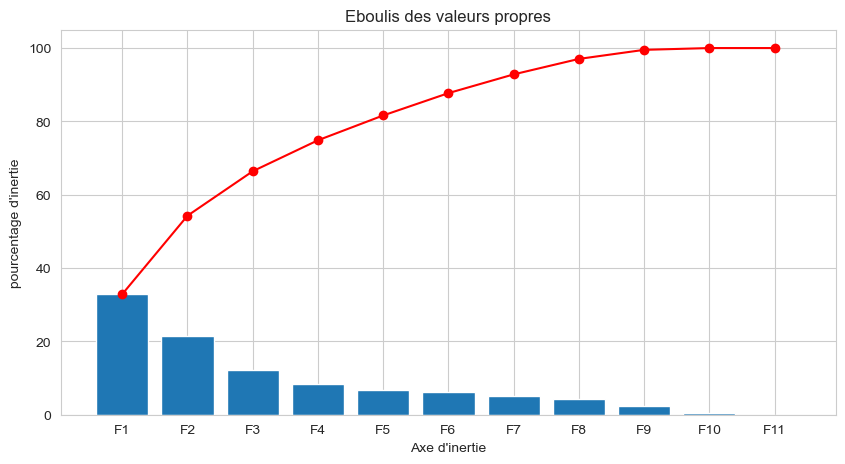

In [57]:
# n_components=11
# x_list = range(1, n_components+1) # np.arange(len(scree))+1
# list(x_list)
def Eboulis(pca,scree,figsize = (10,5)):
    plt.figure(figsize = figsize)
    plt.bar(['F'+str(i+1) for i in np.arange(len(scree))], scree)
    plt.plot(['F'+str(i+1) for i in np.arange(len(scree))], scree.cumsum(),c="red",marker='o')
    plt.xlabel("Axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Eboulis(pca,scree,figsize = (10,5))

### <font color="#114b98"> Composantes ou facteurs </font>

In [58]:
#Espace des composantes principales
pcs = pca.components_

pcs = pd.DataFrame(pca.components_)
pcs

0         1         2             3         4         5   \
0   1.628329e-01  0.185204  0.445974  4.140071e-01  0.363862  0.247831   
1   6.758150e-02  0.236882  0.228450 -2.335316e-03  0.076328  0.414602   
2   5.019414e-01  0.311548 -0.206094  1.365004e-01  0.352684 -0.350500   
3   5.401976e-01  0.337853 -0.135026 -3.808254e-01 -0.416803  0.132689   
4  -4.221536e-01  0.811920 -0.083752 -9.025238e-02  0.081525 -0.123011   
5   3.704678e-01 -0.057405  0.138265 -2.408395e-01 -0.037160  0.247629   
6  -3.282007e-01  0.076195  0.028414 -3.185922e-01 -0.181322  0.264614   
7   4.957655e-03 -0.135536 -0.265382 -2.821724e-01  0.269140 -0.363360   
8   4.274990e-02  0.108113  0.084772  5.214304e-01 -0.670654 -0.313723   
9   1.147668e-02  0.002295  0.763975 -3.818000e-01 -0.023441 -0.499304   
10  3.532131e-07 -0.000002 -0.000004  8.058635e-07  0.000003 -0.000001   

              6             7         8         9         10  
0   9.977857e-02  2.030529e-01  0.282656  0.349280  0.349280  
1   4.755532e-01  2.093837e-01 -0.287131 -0.422474 -0.422472  
2   2.120135e-01 -5.157573e-01 -0.176341 -0.017292 -0.017294  
3  -4.088349e-02  3.244501e-01 -0.144240  0.236331  0.236334  
4  -2.444223e-01  5.729726e-02  0.222750 -0.080595 -0.080594  
5  -2.041094e-01 -2.884227e-01  0.685685 -0.249623 -0.249625  
6   5.323976e-01 -5.041803e-01  0.095857  0.259265  0.259268  
7   5.011441e-01  4.495531e-01  0.416675 -0.010691 -0.010697  
8   2.845451e-01  1.837264e-03  0.252818 -0.084624 -0.084624  
9  -1.762993e-02 -2.974517e-02 -0.138760 -0.008085 -0.008081  
10  3.937902e-07  8.775843e-07  0.000003 -0.707107  0.707106

In [59]:
features=X.columns
pcs.columns = features
pcs.index = ['F'+str(i+1)  for i in np.arange(len(scree))]
pcs.round(2)

additives_n  ingredients_from_palm_oil_n  energy_100g  fat_100g  \
F1          0.16                         0.19         0.45      0.41   
F2          0.07                         0.24         0.23     -0.00   
F3          0.50                         0.31        -0.21      0.14   
F4          0.54                         0.34        -0.14     -0.38   
F5         -0.42                         0.81        -0.08     -0.09   
F6          0.37                        -0.06         0.14     -0.24   
F7         -0.33                         0.08         0.03     -0.32   
F8          0.00                        -0.14        -0.27     -0.28   
F9          0.04                         0.11         0.08      0.52   
F10         0.01                         0.00         0.76     -0.38   
F11         0.00                        -0.00        -0.00      0.00   

     saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
F1                 0.36                0.25         0.10        0.20   
F2                 0.08                0.41         0.48        0.21   
F3                 0.35               -0.35         0.21       -0.52   
F4                -0.42                0.13        -0.04        0.32   
F5                 0.08               -0.12        -0.24        0.06   
F6                -0.04                0.25        -0.20       -0.29   
F7                -0.18                0.26         0.53       -0.50   
F8                 0.27               -0.36         0.50        0.45   
F9                -0.67               -0.31         0.28        0.00   
F10               -0.02               -0.50        -0.02       -0.03   
F11                0.00               -0.00         0.00        0.00   

     proteins_100g  salt_100g  sodium_100g  
F1            0.28       0.35         0.35  
F2           -0.29      -0.42        -0.42  
F3           -0.18      -0.02        -0.02  
F4           -0.14       0.24         0.24  
F5            0.22      -0.08        -0.08  
F6            0.69      -0.25        -0.25  
F7            0.10       0.26         0.26  
F8            0.42      -0.01        -0.01  
F9            0.25      -0.08        -0.08  
F10          -0.14      -0.01        -0.01  
F11           0.00      -0.71         0.71

In [60]:
pcs.T

F1        F2        F3        F4        F5  \
additives_n                  0.162833  0.067581  0.501941  0.540198 -0.422154   
ingredients_from_palm_oil_n  0.185204  0.236882  0.311548  0.337853  0.811920   
energy_100g                  0.445974  0.228450 -0.206094 -0.135026 -0.083752   
fat_100g                     0.414007 -0.002335  0.136500 -0.380825 -0.090252   
saturated-fat_100g           0.363862  0.076328  0.352684 -0.416803  0.081525   
carbohydrates_100g           0.247831  0.414602 -0.350500  0.132689 -0.123011   
sugars_100g                  0.099779  0.475553  0.212013 -0.040883 -0.244422   
fiber_100g                   0.203053  0.209384 -0.515757  0.324450  0.057297   
proteins_100g                0.282656 -0.287131 -0.176341 -0.144240  0.222750   
salt_100g                    0.349280 -0.422474 -0.017292  0.236331 -0.080595   
sodium_100g                  0.349280 -0.422472 -0.017294  0.236334 -0.080594   

                                   F6        F7        F8        F9       F10  \
additives_n                  0.370468 -0.328201  0.004958  0.042750  0.011477   
ingredients_from_palm_oil_n -0.057405  0.076195 -0.135536  0.108113  0.002295   
energy_100g                  0.138265  0.028414 -0.265382  0.084772  0.763975   
fat_100g                    -0.240840 -0.318592 -0.282172  0.521430 -0.381800   
saturated-fat_100g          -0.037160 -0.181322  0.269140 -0.670654 -0.023441   
carbohydrates_100g           0.247629  0.264614 -0.363360 -0.313723 -0.499304   
sugars_100g                 -0.204109  0.532398  0.501144  0.284545 -0.017630   
fiber_100g                  -0.288423 -0.504180  0.449553  0.001837 -0.029745   
proteins_100g                0.685685  0.095857  0.416675  0.252818 -0.138760   
salt_100g                   -0.249623  0.259265 -0.010691 -0.084624 -0.008085   
sodium_100g                 -0.249625  0.259268 -0.010697 -0.084624 -0.008081   

                                      F11  
additives_n                  3.532131e-07  
ingredients_from_palm_oil_n -1.775007e-06  
energy_100g                 -3.530328e-06  
fat_100g                     8.058635e-07  
saturated-fat_100g           2.645607e-06  
carbohydrates_100g          -1.211488e-06  
sugars_100g                  3.937902e-07  
fiber_100g                   8.775843e-07  
proteins_100g                2.762564e-06  
salt_100g                   -7.071075e-01  
sodium_100g                  7.071061e-01

### <font color="#114b98"> Matrice de Correlation </font>

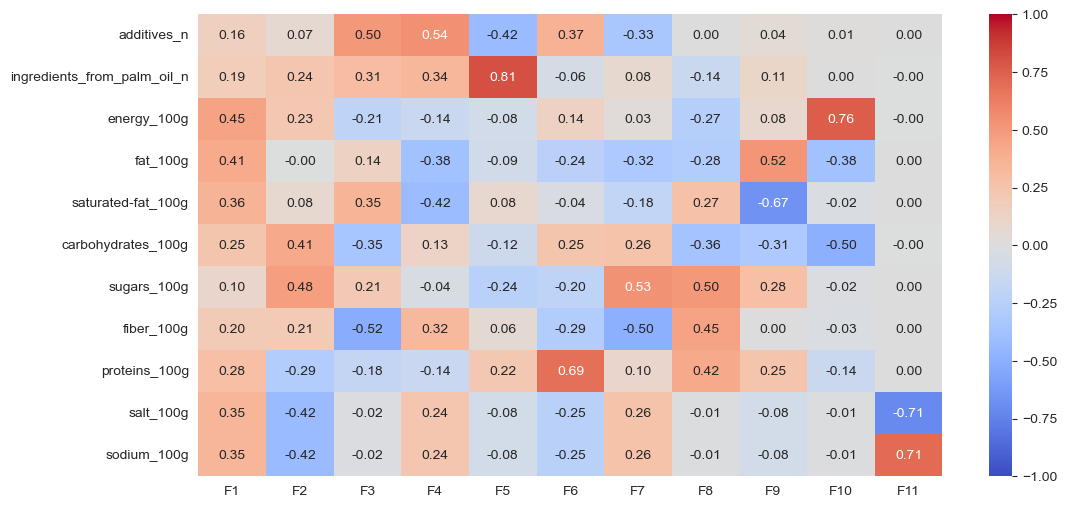

In [61]:
def GraphCorrelation(pcs,figsize=(12, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

GraphCorrelation(pcs,figsize=(12, 6))

### <font color="#114b98"> b. Graphique des variables </font>

In [63]:
def correlation_graph(pca, 
                      x_y, 
                      features,figsize=(8, 8)) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=figsize)

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

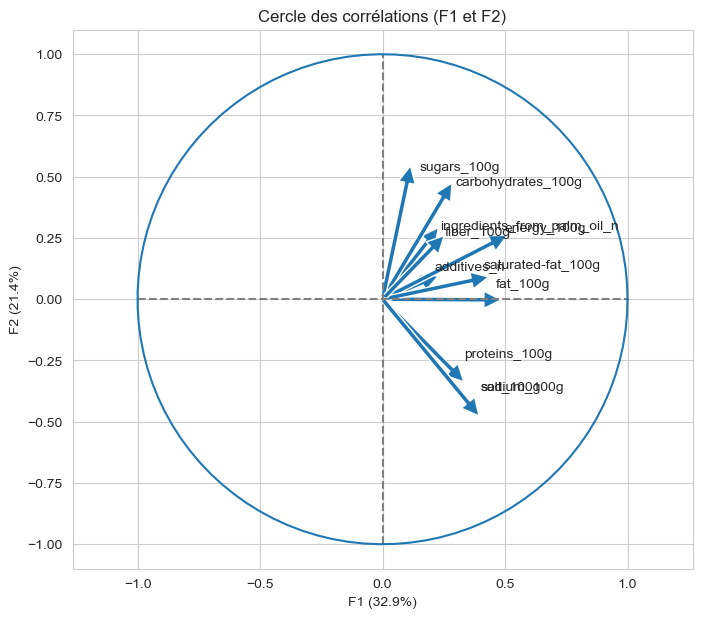

In [64]:
correlation_graph(pca, (0,1), features,figsize=(8,7))

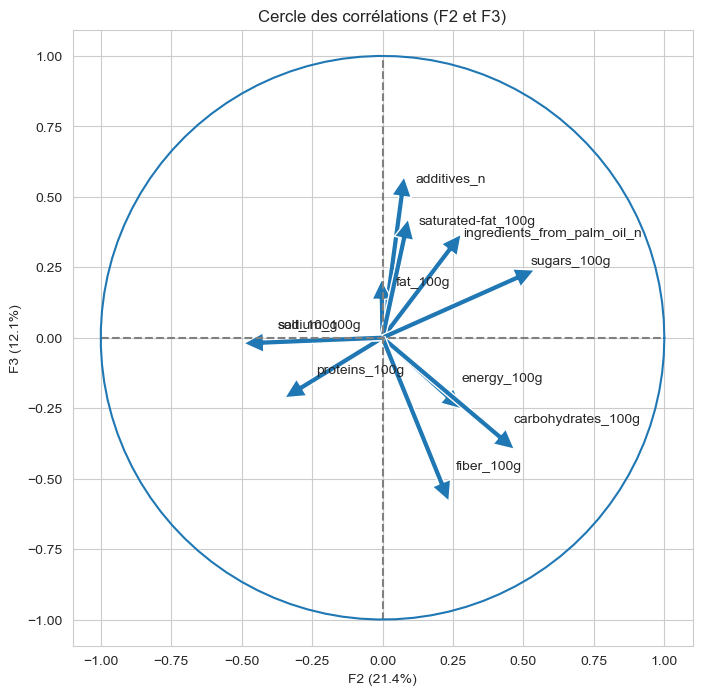

In [65]:
correlation_graph(pca, (1,2), features)

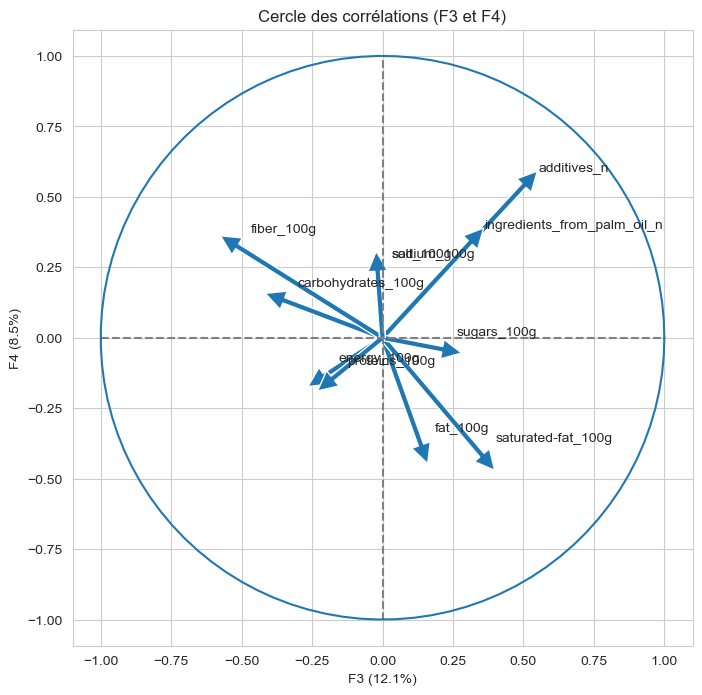

In [66]:
correlation_graph(pca, (2,3), features)

In [67]:
# # Matrice des corrélations variables x facteurs
# p = X.shape[1]
# sqrt_valprop = np.sqrt(pca.explained_variance_)
# corvar = np.zeros((p, p))
# for dim in range(p):
#     corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

# # on affiche pour les deux premiers plans factoriels 
# corr_matrix = pd.DataFrame({'feature':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
#               'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3]})
# corr_matrix

### Projection des individus

In [68]:
X_proj = pca.transform(X_scaled)

In [69]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



In [70]:
names =X.index
names

Index(['Pepsi, Nouveau goût !', '7Up', 'Madeleines nature', 'Cakes Raisins',
       'Cakes aux Fruits', 'Financiers aux Amandes', 'Fondants Citron',
       '30 Panach' Fruits', 'Stem Ginger Cookies', 'Chicken pad thaï',
       ...
       'Boisson au soja (soy bean 8%)', 'Yeo's Soy Bean Drink',
       'Sauce pimentée à l'ail', 'Mantou Sandwich', '100% Pur Jus 4 agrumes ',
       'Spearmint sans sucres', 'Fisherman's Friend Miel-Citron',
       'Nature cheddar and red onion crisps',
       'Tartines craquantes bio au sarrasin', 'Thé vert Earl grey'],
      dtype='object', name='product_name', length=30359)

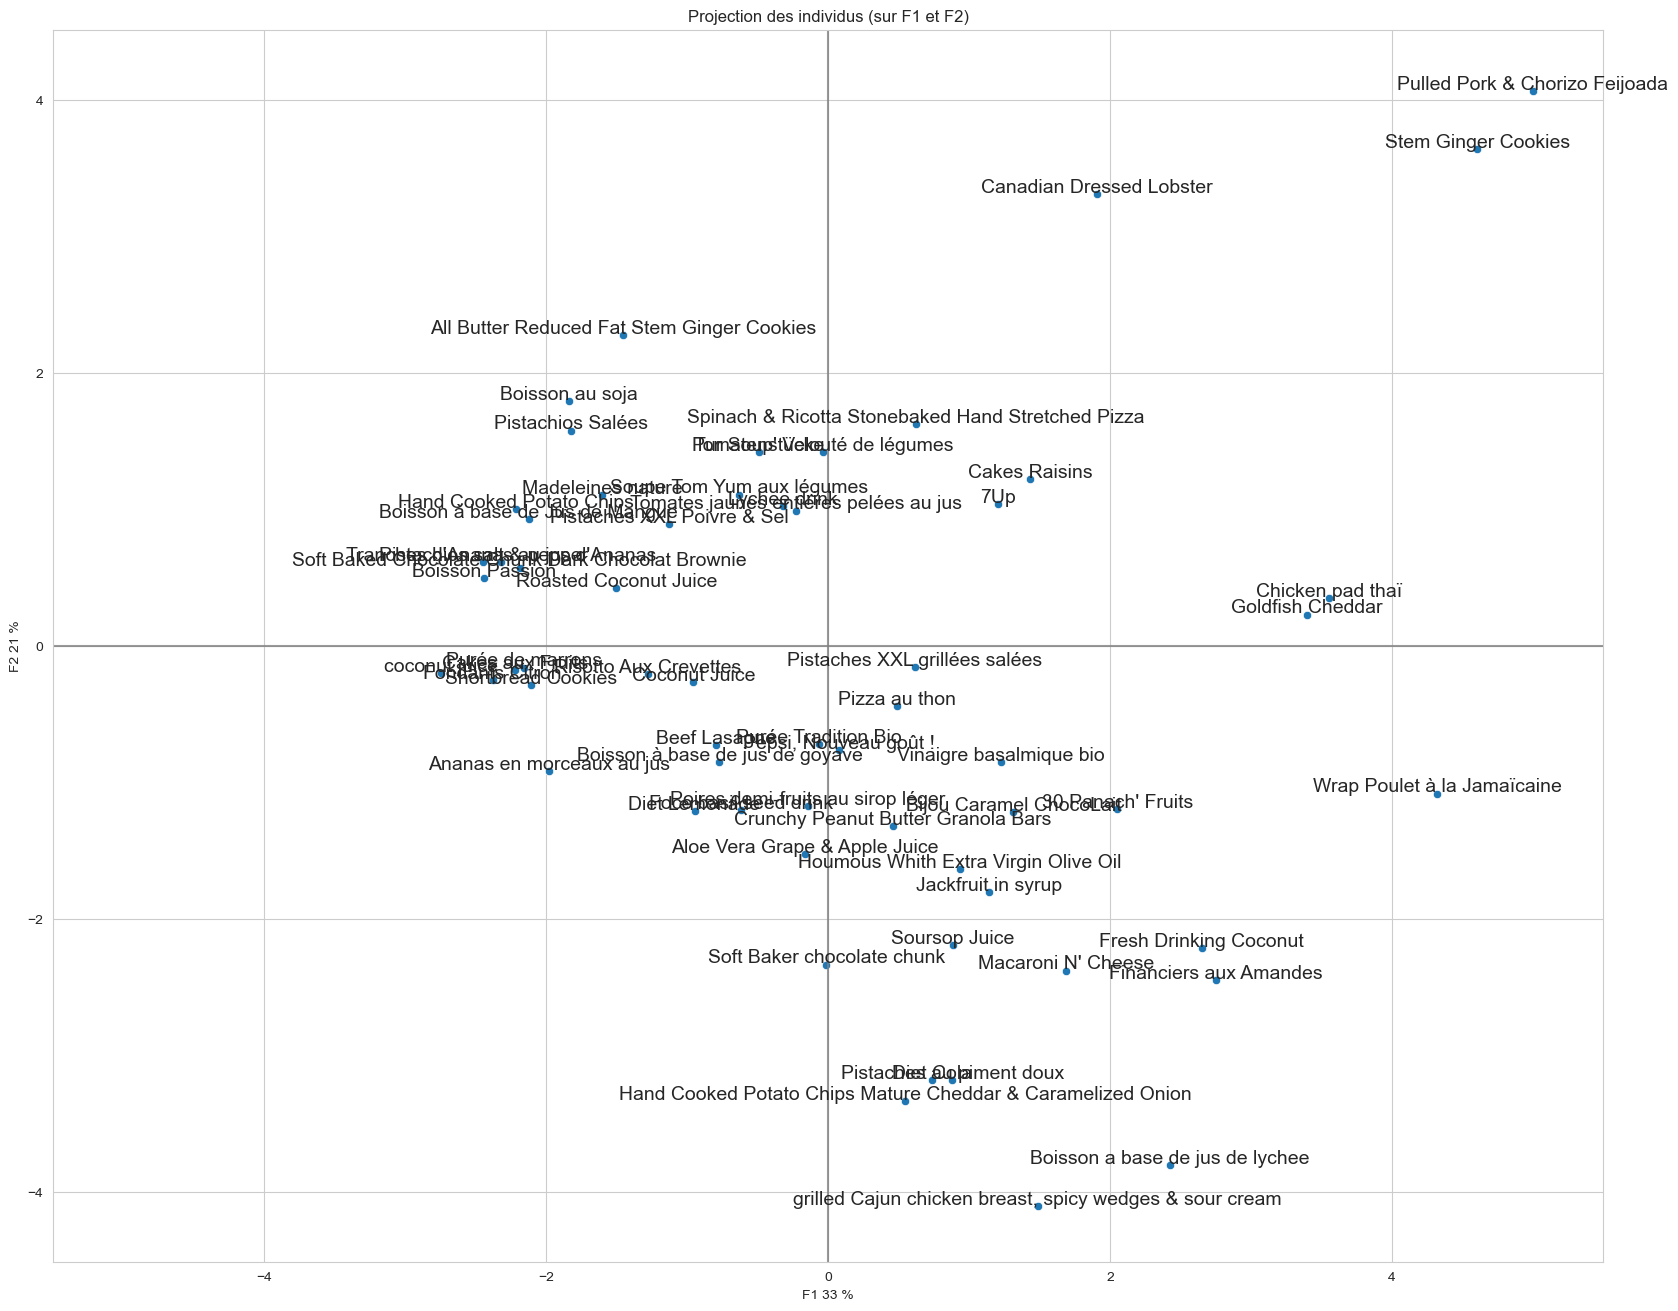

In [71]:
x_y = [0,1]
display_factorial_planes(np.array(pd.DataFrame(X_proj).sample(60)), x_y, pca, labels=names, figsize=(20,16), marker="o")

### <p style="background-color:#EDEDED;color:#4F6272;font-size:130%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid #805AD5 5px; border-bottom: solid #805AD5 2px;border-radius: 10px 10px;padding-right: 10px;"> <img src='./logoc.png' width=30px align='left' alt='Alternative text' /> &nbsp;&nbsp; 6 - Méthode des K-Means </p>  </a>
<a id="6" > 

------------------------
**Le clustering** consiste à regrouper selon **un lien (critère) de similarité**, une grande quantité de données en plusieurs sous-ensembles appelés clusters. Les éléments contenus dans un cluster sont ***similaires les uns aux autres***, mais ***différents des éléments des autres clusters***.

**K-means** (k-moyens en français) est un algorithme de clustering. Il consiste à regrouper les éléments de notre jeu de donnée en groupes, appelés **clusters**. Le but est de faire ressortir les patterns cachés dans la donnée en regroupant les éléments qui se « ressemblent »

Il suit une procédure simple consistant à classer un ensemble de données dans un nombre de clusters, défini par la lettre « k » , qui est fixé au préalable.

On positionne ensuite les clusters comme des points. On associe tous les observations ou points de données au cluster le plus proche, calculés et ajustés. Puis, le processus recommence en utilisant les nouveaux ajustements jusqu’à ce qu’un résultat souhaité soit atteint.

----------------------------------

### <font color="#114b98">6.1. Determination du nombre de cluster optimal (**k**)</font> 
<a id="6.1"> 

---------------
Selon l’algorithme de **K-Means**, on doit définir au préalable le nombre K de clusters. Le problème qui se pose et de trouver un K optimal. L’une des méthodes les plus populaires pour y arriver est la méthode d’**Elbow**.

L’idée est d’exécuter le clustering k-means pour une gamme de clusters k (disons de 1 à 10) et pour chaque valeur, nous calculons l’inertie intraclasse.

--------------------------

In [72]:
varlist=['nutriscore_score','energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                           'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

In [73]:
from sklearn.cluster import KMeans

def GriSearchKmeans(df, kmax,figsize=(7,4)):
    tab=[]
    for i in range(1,kmax):
        # On instancie un k-means pour k clusters
        kmeans=KMeans(n_clusters=i)
        # On entraine
        kmeans.fit(df)
        # On enregistre l'inertie obtenue
        tab.append(kmeans.inertia_)
    plt.figure(figsize = figsize)
    plt.plot(range(1,kmax),tab)
    plt.title("La méthode Elbow")
    plt.xlabel("nombre de cluster")
    plt.ylabel("Inertie intra-classe")
    plt.show()
    
# fig, ax = plt.subplots(1,1,figsize=(12,6))
# ax.set_ylabel("intertia")
# ax.set_xlabel("n_cluster")
# ax = plt.plot(range(1,kmax), tab)


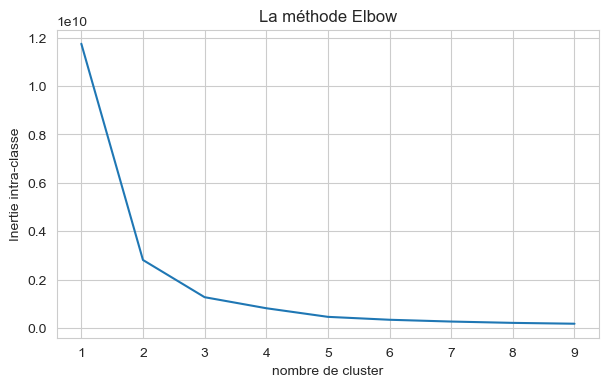

In [74]:
dfKmean=dfood[varlist]
GriSearchKmeans(dfKmean, 10)

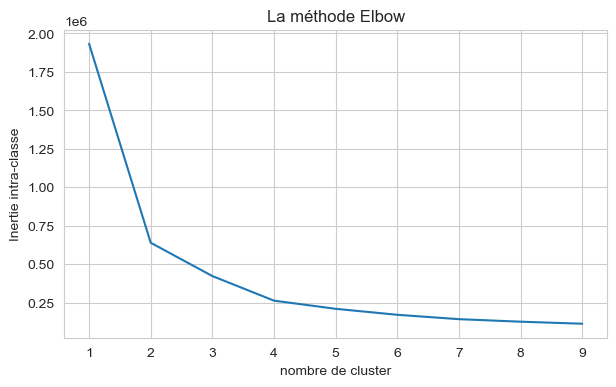

In [75]:
dfKmean=dfood[['nutriscore_score','saturated-fat_100g']]
GriSearchKmeans(dfKmean, 10)

------------
Pour choisir le nombre de clusters, on applique la méthode du "coude", et on cherche une "cassure" dans la courbe liant la variance intraclasse au nombre de clusters. **Dans notre cas, nous constatons que le nombre optimal de clusters est** : **_4_**.

---------------

### <font color="#114b98">6.2. Application de l’algorithme de K Means (**k**)</font> 
<a id="6.2"> 

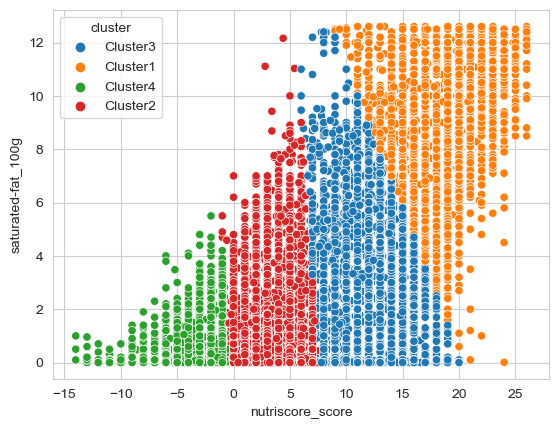

In [76]:
def KmeansApply(df,k,var1,var2):
# Application deKMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[[var1,var2]])
    klist=[f'Cluster{i+1}' for i in range(k)]    
    dd = {i:j for i,j in enumerate(klist)}
    # dd
    labels = [dd[i] for i in kmeans.labels_]
    # labels
    df["cluster"] = labels
    #Visualisation
    colormap=np.array(AllColors[:k])
    sns.scatterplot(x=df[var1], y=df[var2], data=df,c=colormap[kmeans.labels_],hue='cluster')
    plt.show()
    
KmeansApply(dfKmean,4,'nutriscore_score','saturated-fat_100g')   

<Figure size 2000x1200 with 0 Axes>

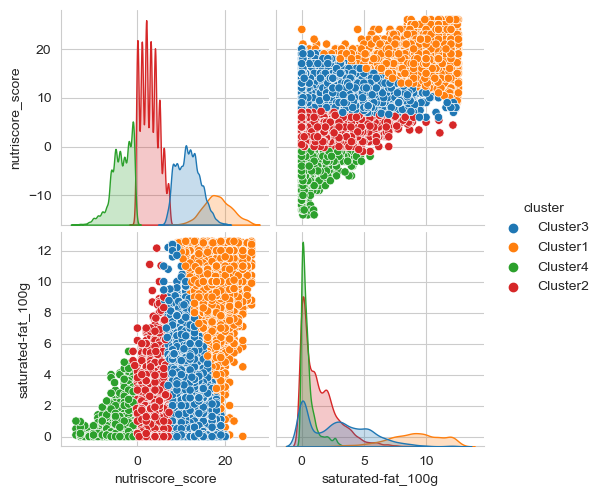

In [77]:
plt.figure(figsize=(20,12))
sns.pairplot(dfKmean, hue="cluster")

### <font color="#114b98">6.3. Visualisation des clusters & centroides </font> 
<a id="6.3"> 

----------
L'algorithme du **k-means** travaille avec les centres de gravité des ***groupes/Classes/Clusters***. Ces centres de gravité sont appelés **centroïdes**

---------------

In [78]:
from sklearn.cluster import MiniBatchKMeans 
from matplotlib.lines import Line2D

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 14,
             }

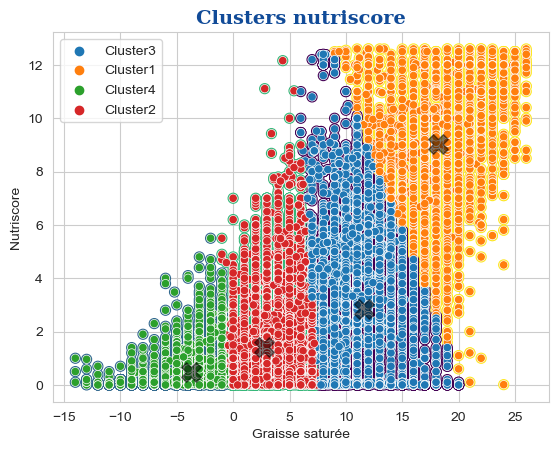

In [79]:
def graphCentroide(X, k,var1,var2,cmap='viridis'):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[[var1,var2]])
    y_kmeans = kmeans.predict(X[[var1,var2]])
    plt.scatter(X[[var1]], X[[var2]], c=y_kmeans, s=50, cmap=cmap)
    colors=plt.get_cmap(cmap)(np.arange(256))[:k]
    centers = kmeans.cluster_centers_
    sns.scatterplot(x=var1, y=var2,hue="cluster",data=X)
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', c='black', s=200, alpha=0.5)

    plt.title('Clusters nutriscore',fontdict=font_title)
    plt.xlabel('Graisse saturée')
    plt.ylabel('Nutriscore')
    plt.legend(loc='upper left')
    plt.show()
    
graphCentroide(dfKmean,4,'nutriscore_score','saturated-fat_100g')

In [80]:
X=dfKmean[['nutriscore_score','saturated-fat_100g']]

def graphCluster(df,k,var1,var2,figsize=(8,8),M=5):
    var1max=df[[var1]].max()
    var2max=df[[var2]].max()
    # k means
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[[var1,var2]])
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({i:cen_x[i] for i in range(k)})
    df['cen_y'] = df.cluster.map({i:cen_y[i] for i in range(k)})
    # define and map colors
    colors = AllColors[-k:]
    df['c'] = df.cluster.map({i:colors[i] for i in range(k)})

    fig, ax = plt.subplots(1, figsize=figsize)
    # plot data
    plt.scatter(df[[var1]], df[[var2]], c=df.c, alpha = 0.6, s=10)
    # plot centroids
    plt.scatter(cen_x, cen_y, marker='^', c=AllColors[:k], s=70)
    # plot Attack mean
    plt.plot([df[[var1]].mean()]*2, [0,df[[var1]].max()+M], color='black', lw=0.5, linestyle='--')
    plt.xlim(0,var1max[0]+M)
    # plot Defense mean
    plt.plot([0,df[[var2]].max()+M], [df[[var2]].mean()]*2, color='black', lw=0.5, linestyle='--')
    plt.ylim(0,var2max[0]+M)
    
    # create a list of legend elemntes
    ## average line
    legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
    ## markers / records
    cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
    ## centroids
    cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
                markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(AllColors[:k])]
    
    # add all elements to the same list
    legend_elements.extend(cluster_leg)
    legend_elements.extend(cent_leg)
    # plot legend
    plt.legend(handles=legend_elements, loc='upper right', ncol=2)
    # title and labels
    plt.title('Les différents clusters \n', loc='left', fontsize=22)
    plt.xlabel(var1)
    plt.ylabel(var2)

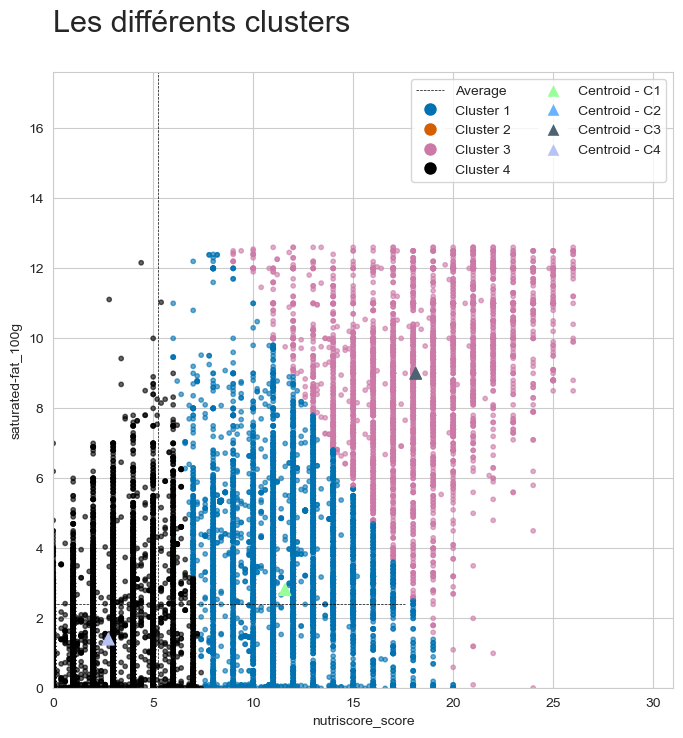

In [81]:
graphCluster(X,4,'nutriscore_score','saturated-fat_100g',figsize=(8,8))

### <font color="#114b98">6.4. Lien entre les clusters et les nutrigrades </font> 
<a id="6.4"> 

In [82]:
dfood['nutriscore_grade'].unique()

['E', 'D', 'A', 'B', 'C']
Categories (5, object): ['A', 'B', 'C', 'D', 'E']

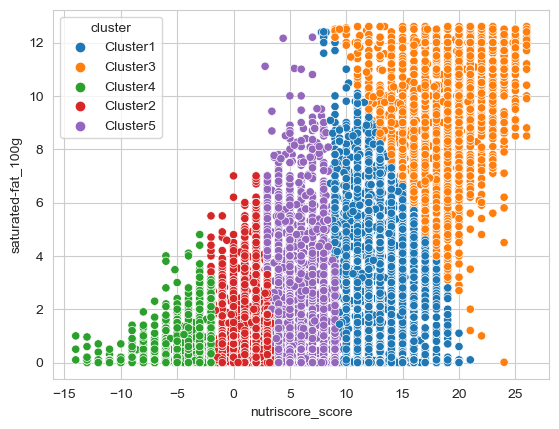

In [83]:
dfNutrigrade=dfood[['nutriscore_grade','nutriscore_score','saturated-fat_100g']]
KmeansApply(dfNutrigrade,5,'nutriscore_score','saturated-fat_100g') 

In [84]:
dfNutrigrade

nutriscore_grade  nutriscore_score  saturated-fat_100g   cluster
0                    E              13.0                0.00  Cluster1
1                    E              13.0                0.00  Cluster1
2                    D              12.0                2.50  Cluster1
3                    D              13.0                2.50  Cluster1
4                    D              12.0                2.00  Cluster1
...                ...               ...                 ...       ...
30354                C               4.0                1.28  Cluster5
30355                B               2.0                1.28  Cluster2
30356                C               9.0                3.40  Cluster5
30357                A              -4.0                0.60  Cluster4
30358                C               2.0                0.20  Cluster2

[30359 rows x 4 columns]

In [85]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

contigency= pd.crosstab(dfNutrigrade['nutriscore_grade'], dfNutrigrade['cluster'])
contigency

cluster           Cluster1  Cluster2  Cluster3  Cluster4  Cluster5
nutriscore_grade                                                  
A                        2      1445         0      5208         2
B                        0      5736         0        93         0
C                      818      2136        20         0      5773
D                     3975         0      1589         0       695
E                     1384         0      1483         0         0

In [86]:
contigency_pct = pd.crosstab(dfNutrigrade['nutriscore_grade'], dfNutrigrade['cluster'], normalize='index')
contigency_pct.round(2)

cluster           Cluster1  Cluster2  Cluster3  Cluster4  Cluster5
nutriscore_grade                                                  
A                     0.00      0.22      0.00      0.78      0.00
B                     0.00      0.98      0.00      0.02      0.00
C                     0.09      0.24      0.00      0.00      0.66
D                     0.64      0.00      0.25      0.00      0.11
E                     0.48      0.00      0.52      0.00      0.00

Text(0.5, 1.0, 'Heatmap avec les variables nutrigrade et cluster \n')

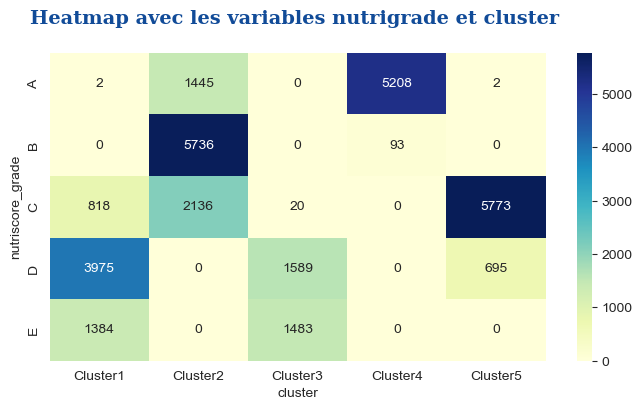

In [87]:
plt.figure(figsize=(8,4))
sns.heatmap(contigency, annot=True, fmt=".0f", cmap="YlGnBu")# cmap = 'coolwarm'
plt.title("Heatmap avec les variables nutrigrade et cluster \n", fontdict=font_title)

**Test Chi Square** 
>**chi2:** *The test statistic* <br>
>**p:** *The p-value of the test*<br>
>**dof:** *Degrees of freedom*<br>
>**expected:** *The expected frequencies, based on the marginal sums of the table*<br>

In [88]:
# Le test Chi-square 
c, p, dof, expected = chi2_contingency(contigency) 
# Affichage de la p-value
print('P-value du test :', p.round(3))

P-value du test : 0.0


<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> <p style='margin-left:0.9em;'>
   Le test de <b> Chi square </b> vient confirmer la dependance entre les nutrigrades et les clusters.
En effet, la p-value vaut  <b> 0.000 </b>: donc,  <b> rejet de l'hypothèse nulle </b>.
    </p>
</span>
</div>

<div class="warning" style="color:#4F6272;font-size:107%;text-align:left;  padding-top: 5px;  padding-left: 5px;  padding-right: 5px; padding-bottom: 10px; margin-bottom: 5px; border-top: solid gray 5px; border-bottom: solid gray 2px;border-radius: 30px 30px;padding-right: 10px;">
<span> <p style='margin-left:0.9em;'> 
    - Le <b>cluster 4</b> est associé au <b>nutrigrade A</b><br>
    - Le <b>cluster 1</b> est associé au <b>nutrigrade B</b> <br>
    - Le <b>cluster 5</b> est associé au <b>nutrigrade C</b><br>
    - Les <b>cluster 2 & 3 </b> sont associés aux <b>nutrigrade D & E</b> 
    </p>
</span>
</div>

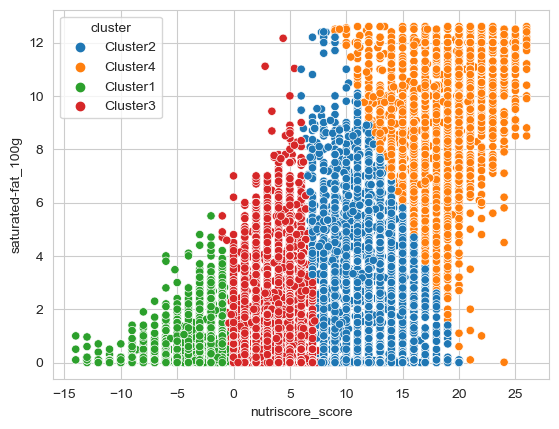

Pvalue : 0.0


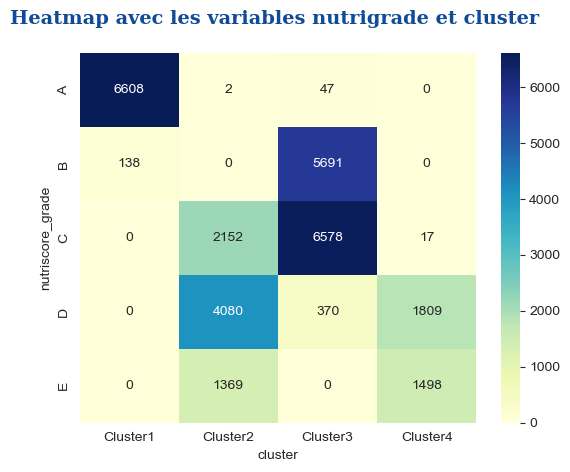

In [89]:
KmeansApply(dfNutrigrade,4,'nutriscore_score','saturated-fat_100g') 
contigency= pd.crosstab(dfNutrigrade['nutriscore_grade'], dfNutrigrade['cluster'])
sns.heatmap(contigency, annot=True, fmt=".0f", cmap="YlGnBu")# cmap = 'coolwarm'
plt.title("Heatmap avec les variables nutrigrade et cluster \n", fontdict=font_title)
# Le test Chi-square 
c, p, dof, expected = chi2_contingency(contigency) 
print("Pvalue :", p)

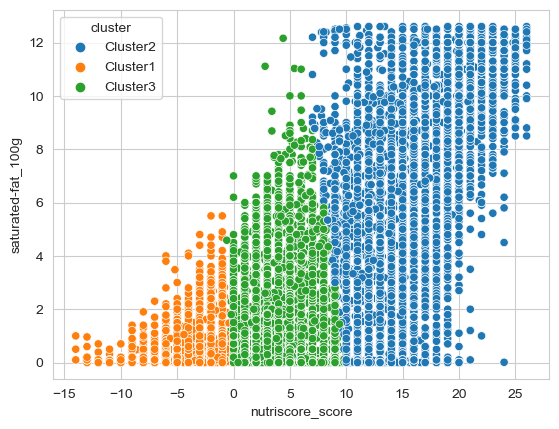

Pvalue : 0.0


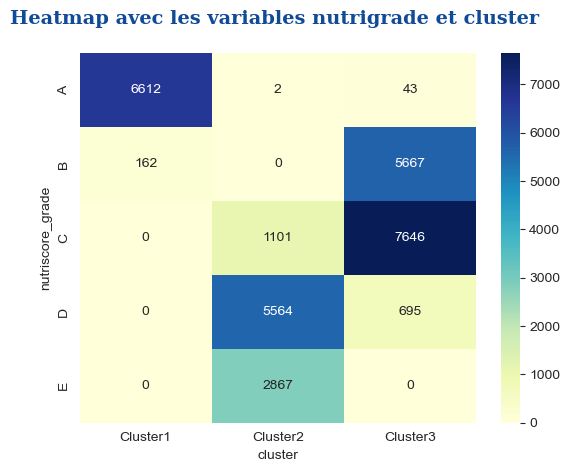

In [90]:
KmeansApply(dfNutrigrade,3,'nutriscore_score','saturated-fat_100g') 
contigency= pd.crosstab(dfNutrigrade['nutriscore_grade'], dfNutrigrade['cluster'])
sns.heatmap(contigency, annot=True, fmt=".0f", cmap="YlGnBu")# cmap = 'coolwarm'
plt.title("Heatmap avec les variables nutrigrade et cluster \n", fontdict=font_title)
# Le test Chi-square 
c, p, dof, expected = chi2_contingency(contigency) 
print("Pvalue :", p)